### 1. 분류

-대표적인 지도학습  
-<span style="color:red">학습데이터로 주어진 데이터의 피처와 레이블값(결정값,클래스값)을 학습해 모델 생성하고, 모델에 새로운 데이터값이 주어졌을때 레이블값을 예측하는 것</span>  
  
분류알고리즘  
-베이즈 통계와 생성모델에 기반한 나이브 베이즈  
-독립변수와 종속변수의 선형 관계성에 기반한 로지스틱 회귀  
-<span style="color:red">데이터 균일도에 따른 규칙 기반의 결정트리</span>  
-개별 클래스간의 최대 분류 마진을 효과적으로 찾아주는 서포트 벡터 머신  
-근접 거리를 기분으로 하는 최소 근접 알고리즘  
-심층 연결 기반의 신경망  
-<span style="color:red">서로 다른 (또는 같은) 머신러닝 알고리즘을 결합한 앙상블 -> 집중적으로 다룸</span>


### 2. 결정트리
  
-데이터에 있는 규칙을 학습을 통해 자동으로 찾아내 트리 기반의 분류 규칙을 만드는 것  
-데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가가 알고리즘의 성능을 크게 좌우함  

-규칙노드(Decision Node), 리프노드(Leaf Node)로 구성  
- 규칙노드: 하위트리를 분할하는 규칙  
- 리프노드: 결정값  

![트리](img/tree1.png)

-가능한 한 적은 결정노드로 높은 예측정확도를 가지려면 데이터를 분류할 때 최대한 많은 데이터 세트가 해당 분류에 속할 수 있도록 결정노드의 규칙이 정해져야 함 -> <span style="color:red">최대한 균일한 데이터 세트를 구성할 수 있도록 분할</span>  
-결정노드는 최대한 균일한 데이터세트를 구성할 수 있도록 분할  
-엔트로피: 주어진 데이터 집합의 혼잡도를 의미(서로 다른 값이 섞여 있으면 엔트로피가 높고, 같은 값이 섞여 있으면 엔트로피가 낮음

-정보의 균일도를 측정하는 대표적인 방법  
○ 정보이득(Information Gain) 지수 : 1-엔트로피   
○ 지니계수(Gini coefficient) : 경제학자 코라도 지니가 경제학에서 불평등 지수를 나타날때 사용한 것으로 0이 가장 평등함  

-결정트리 알고리즘을 사이킷런에서 구현한 DecisionTreeClassifier 는 기본으로 지니계수를 이용

![트리](img/tree3.png)

결정 트리 모델의 특징  
-장점 : 정보의 균일도라는 룰을 기반으로 하고 있어서 알고리즘이 쉽고 직관적이라는 점. 각 피처의 스케일링과 정규화 같은 전처리 작업이 필요없음  
-단점 : 과적합으로 정확도가 떨어진다는 점. 트리의 크기를 사전에 제한하는 것이 오히려 성능 튜닝에 더 도움이 됨

결정트리 파라미터  
-사이킷런은 결정 트리 알고리즘을 구현한 DecisionTreeClassifier와 DecisionTreeRegressor 클래스를 제공  
-사이킷런의 결정트리 구현은 CART(Classification and Regression Trees) 알고리즘 기반

![파라미터](img/tree4.png)
![파라미터](img/tree5.png)

결정트리 모델의 시각화  
- Graphviz 패키지 사용(원래 그래프 기반의 dot 파일로 기술된 다양한 이미지를 쉽게 시각화할 수 있는 패키지 www.graphviz.org)  
- export_graphviz() API 를 제공 : 함수인자로 학습이 완료된 Estimator, 피처의 이름 리스트, 레이블 이름 리스트

1. 윈도우 버전의 Graphviz 를 설치(https://graphviz.org/download/  graphviz-2.49.2 (64-bit) EXE installer [sha256])
1. Graphviz 의 파이썬 래퍼 모듈을 PIP 를 이용해 관리자 권한으로 설치 (C:\Windows\system32>pip install grahpviz)
1. 윈도우 사용자 변수의 경로에 C:\Program Files\Graphviz\bin 추가
1. 시스템 변수의 경로에 C:\Program Files\Graphviz\bin\dot.exe 추가    

![환경변수](img/환경변수.png)

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156)

# 붓꽃 데이터를 로딩하고, 학습과 테스트 데이터 셋으로 분리
iris_data = load_iris()
print(iris_data)
X_train , X_test , y_train , y_test = train_test_split(iris_data.data, iris_data.target,
                                                       test_size=0.2,  random_state=11)

# DecisionTreeClassifer 학습. 
dt_clf.fit(X_train , y_train)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

DecisionTreeClassifier(random_state=156)

In [16]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot", class_names=iris_data.target_names , feature_names = iris_data.feature_names, impurity=True, filled=True)

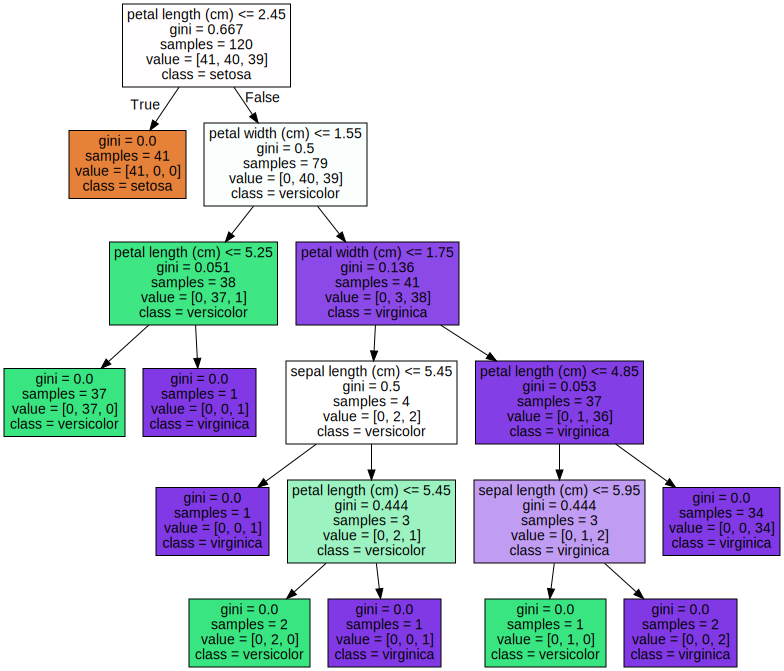

In [17]:
import graphviz

# 위에서 생성된 tree.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

petal length(cm) <= 2.45 와 같이 조건이 있는 것은 자식 노드를 만들기 위한 규칙 조건으로 이런 것이 없는 것은 리프노드  
gini는 다음의 value = [ ] 로 주어진 데이터 분포에서의 지니계수  
samples : 현 규칙에 해당하는 데이터 건수  
value = [ ] 클래스 값 기반의 데이터 건수 ( 이번 예제의 경우 0: Setosa, 1 : Veericolor, 2: Virginia 를 나타냄 )

#### 파라미터(Parameter)
- 머신러닝에서 사용되는 파라미터는 모델 파라미터라고도 하며, 모델에 적용할 하나 이상의 파라미터를 사용하여 새로운 샘플에 대한 예측을 하기 위해 사용
- 즉, 머신러닝 훈련 모델에 의해 요구되는 변수
 
파라미터의 특징
- 예측 모델은 새로운 샘플을 주어지면 무엇을 예측할지 결정할 수 있도록 파라미터를 필요로 한다.
- 머신러닝 훈련 모델의 성능은 파라미터에 의해 결정된다.
- 파라미터는 데이터로부터 추정 또는 학습된다.
- 파라미터는 개발자에 의해 수동으로 설정하지 않는다.(임의로 조정이 불가능하다)
- 학습된 모델의 일부로 저장된다.

모델 파라미터의 예
- 인공신경망의 가중치
- SVM(Support Vector Machine)의 서포트 벡터
- 선형 회귀 또는 로지스틱 회귀에서의 결정계수
 
#### 하이퍼파라미터(Hyperparameter)
- 머신러닝에서 하이퍼파라미터는 최적의 훈련 모델을 구현하기 위해 모델에 설정하는 변수로 학습률(Learning Rate), 에포크 수(훈련 반복 횟수), 가중치 초기화 등을 결정할 수 있습니다. 또한 하이퍼파라미터 튜닝 기법을 적용하여 훈련 모델의 최적값들을 찾을 수 있습니다.

하이퍼파라미터의 특징
- 모델의 매개 변수를 추정하는 데 도움이 되는 프로세스에서 사용된다.
- 하이퍼파라미터는 개발자에 의해 수동으로 설정할 수 있다.(임의 조정 가능)
- 학습 알고리즘의 샘플에 대한 일반화를 위해 조절된다.

하이퍼파라미터의 예
- 학습률
- 손실 함수
- 일반화 파라미터
- 미니배치 크기
- 에포크 수
- 가중치 초기화
- 은닉층의 개수
- k-NN의 k값

하이퍼파라미터의 튜닝 기법
- 그리드 탐색
- 랜덤 탐색
- 베이지안 최적화
- 휴리스틱 탐색
 
모델 파라미터는 새로운 샘플이 주어지면 무엇을 예측할지 결정하기 위해 사용하는 것이며 학습 모델에 의해 결정  
하이퍼파라미터는 학습 알고리즘 자체의 파라미터로 모델이 새로운 샘플에 잘 일반화 되도록 하이퍼파라미터들의 최적값을 찾으나, 데이터 분석 결과로 얻어지는 값이 아니므로 절대적인 최적값은 존재하지 않고, 사용자가 직접 설정

===============max_depth=3인 경우의 Decision Tree 시각화==================


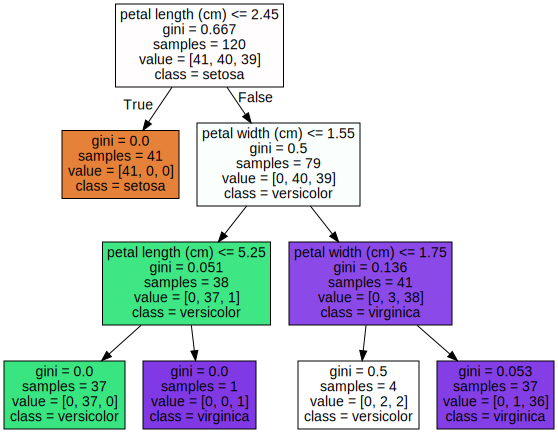

In [18]:
# 결정트리 알고리즘을 제어하는 대부분 하이퍼 파라미터는 복잡한 트리가 생성되는 것을 막기 위한 용도
# DecicionTreeClassifier 생성 (max_depth = 3 으로 제한)
dt_clf = DecisionTreeClassifier(max_depth=3 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('===============max_depth=3인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

===============min_samples_split=4인 경우의 Decision Tree 시각화==================


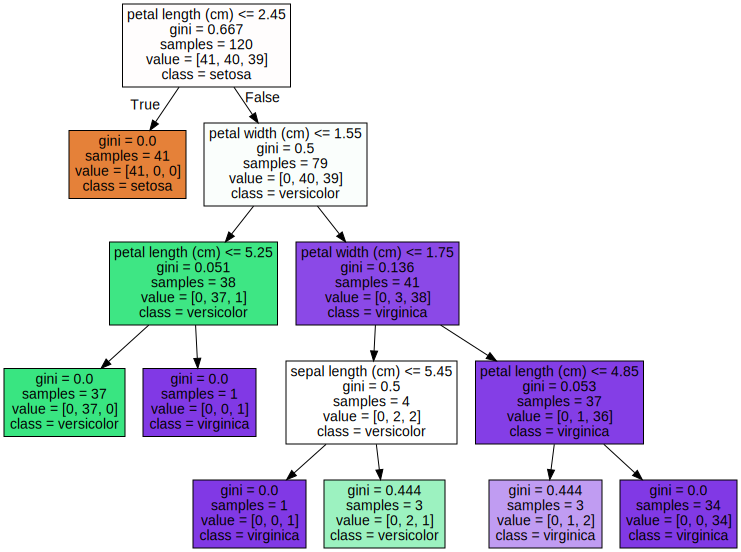

In [19]:
# DecicionTreeClassifier 생성 (min_samples_split=4로 상향)
dt_clf = DecisionTreeClassifier(min_samples_split=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('===============min_samples_split=4인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

===============min_samples_leaf=4인 경우의 Decision Tree 시각화==================


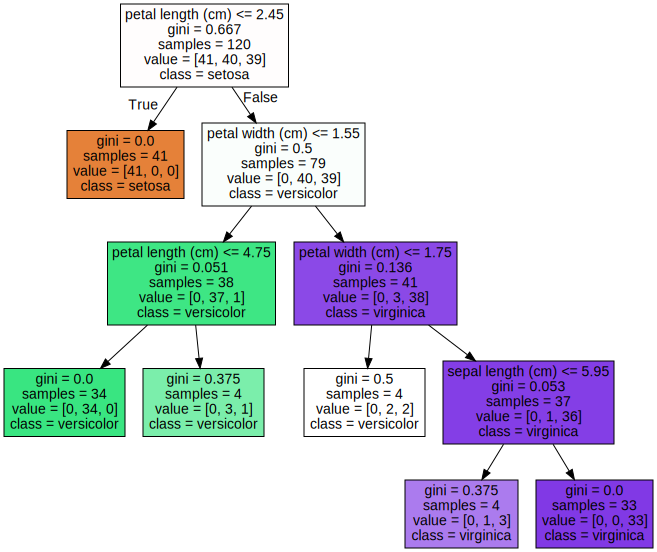

In [20]:
# DecicionTreeClassifier 생성 (min_samples_leaf=4로 상향)
dt_clf = DecisionTreeClassifier(min_samples_leaf=4 ,random_state=156)
dt_clf.fit(X_train, y_train)

# export_graphviz( )의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함
export_graphviz(dt_clf, out_file="tree.dot", class_names = iris_data.target_names, 
                           feature_names = iris_data.feature_names, impurity=True, filled=True)

print('===============min_samples_leaf=4인 경우의 Decision Tree 시각화==================')
import graphviz
# 위에서 생성된 tree.dot 파일을 Graphiviz 가 읽어서 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature Importance 시각화

- 학습을 통해 규칙을 정하는 데 있어 피처의 중요도를 DecisionTreeClassifier 객체의 feature_importances 속성으로 확인할 수 있습니다.  
→기본적으로 ndarray형태로 값을 반환하며 피처 순서대로 값이 할당

Feature Importances:
[0.006 0.    0.546 0.448]

sepal length (cm): 0.006
sepal width (cm): 0.000
petal length (cm): 0.546
petal width (cm): 0.448


<Axes: >

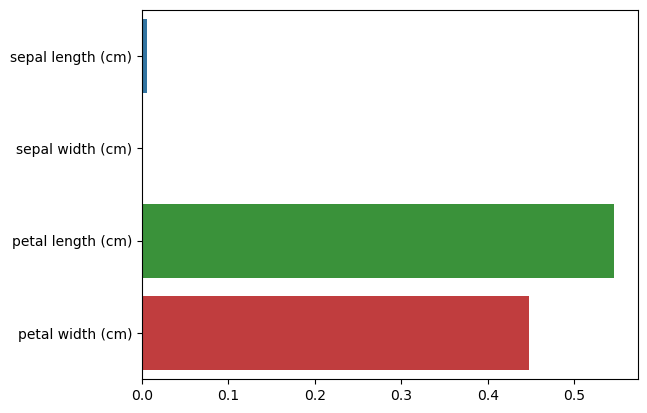

In [21]:
import seaborn as sns
import numpy as np
%matplotlib inline

# feature importance 추출
print("Feature Importances:\n{0}\n".format(np.round(dt_clf.feature_importances_, 3)))

# feature 별 feature importance 매핑
for name, value in zip(iris_data.feature_names, dt_clf.feature_importances_):
    print('{0}: {1:.3f}'.format(name, value))
    
# feature importance 시각화
sns.barplot(x=dt_clf.feature_importances_, y=iris_data.feature_names)

### Decision Tree의 과적합(Overfitting)

임의의 데이터 세트를 통한 과적합 문제 시각화

make_classification 함수는 설정에 따른 분류용 가상 데이터를 생성하는 명령  

인수:
- n_samples : 표본 데이터의 수, 디폴트 100
- n_features : 독립 변수의 수, 디폴트 20
- n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
- n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
- n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
- n_classes : 종속 변수의 클래스 수, 디폴트 2
- n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
- weights : 각 클래스에 할당된 표본 수
- random_state : 난수 발생 시드

반환값:
- X : [n_samples, n_features] 크기의 배열
- y : [n_samples] 크기의 배열

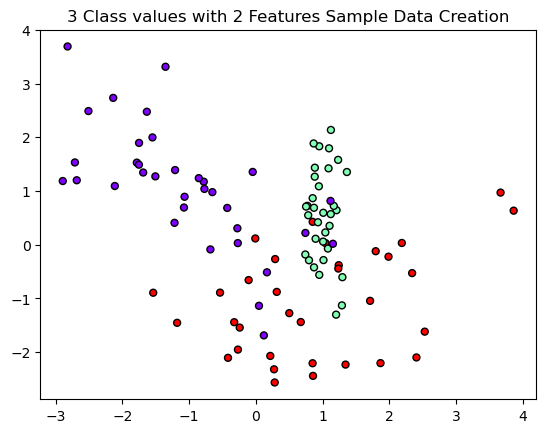

In [22]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

plt.title("3 Class values with 2 Features Sample Data Creation")

# 2차원 시각화를 위해 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성
X_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                                                  n_classes=3, n_clusters_per_class=1, random_state=0)

# 그래프 형태로 2개의 피쳐로 2차원 좌표 시각화, 각 클래스 값은 다른 색으로 표시
plt.scatter(X_features[:, 0], X_features[:, 1], marker='o', c=y_labels, s=25, edgecolor = 'k', cmap='rainbow')

우선 트리 생성 시 파라미터를 디폴트로 놓고, 데이터가 어떻게 분류되는지 확인

In [23]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

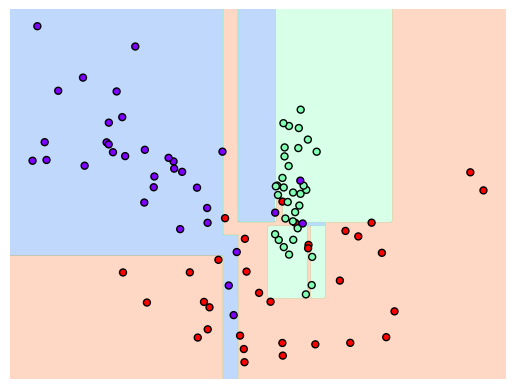

In [24]:
# 특정한 트리 생성에 제약이 없는(전체 default 값) Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier().fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

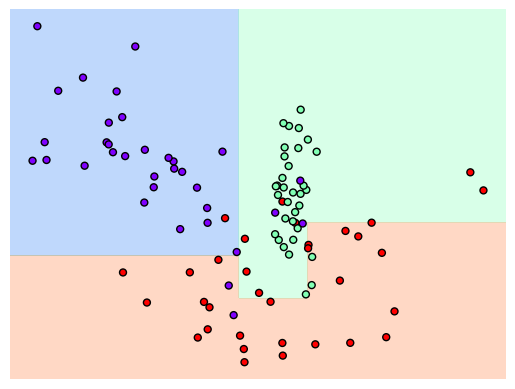

In [25]:
# min_samples_leaf = 6 으로 설정한 Decision Tree의 학습과 결정 경계 시각화
dt_clf = DecisionTreeClassifier(min_samples_leaf=6).fit(X_features, y_labels)
visualize_boundary(dt_clf, X_features, y_labels)

Decision Tree의 과적합을 줄이기 위한 파라미터 튜닝  
(1) max_depth 를 줄여서 트리의 깊이 제한  
(2) min_samples_split 를 높여서 데이터가 분할하는데 필요한 샘플 데이터의 수를 높이기  
(3) min_samples_leaf 를 높여서 말단 노드가 되는데 필요한 샘플 데이터의 수를 높이기  
(4) max_features를 높여서 분할을 하는데 고려하는 feature의 수 제한

#### Decision Tree 실습 - 사용자 행동 인식 데이터 세트 (https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones)

- 30명에게 스마트폰 센서를 장착한 뒤 사람의 동작과 관련된 여러 가지 피처를 수집한 데이터→ 수집된 피처 세트를 기반으로 어떠한 동작인지 예측

- feature_info.txt 과 README.txt : 데이터 세트와 피처에 대한 간략한 설명
- features.txt : 피처의 이름 기술
- activity_labels.txt : 동작 레이블 값에 대한 설명
  
UCI HAR Dataset -> human_activity로 이름 변경


![uci](img/tree6.png)

![uci](img/tree7.png)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# features.txt 파일에는 피처 이름 index와 피처명이 공백으로 분리되어 있음. 이를 DataFrame으로 로드.
feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])

# 피처명 index를 제거하고, 피처명만 리스트 객체로 생성한 뒤 샘플로 10개만 추출
feature_name = feature_name_df.iloc[:, 1].values.tolist()
print('전체 피처명에서 10개만 추출:', feature_name[:10])


FileNotFoundError: [Errno 2] No such file or directory: './human_activity/features.txt'

중복된 피처명 변경

In [ ]:
feature_dup_df = feature_name_df.groupby('column_name').count()
print(feature_dup_df[feature_dup_df['column_index'] > 1].count())
feature_dup_df[feature_dup_df['column_index'] > 1].head()

column_index    42
dtype: int64


,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


원본 데이터에 중복된 Feature 명으로 인하여 신규 버전의 Pandas에서 Duplicate name 에러를 발생.  
중복 feature명에 대해서 원본 feature 명에 '_1(또는2)'를 추가로 부여하는 함수인 get_new_feature_name_df() 생성

In [ ]:
def get_new_feature_name_df(old_feature_name_df):
    feature_dup_df = pd.DataFrame(data=old_feature_name_df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    new_feature_name_df = pd.merge(old_feature_name_df.reset_index(), feature_dup_df, how='outer')
    new_feature_name_df['column_name'] = new_feature_name_df[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1]) 
                                                                                         if x[1] >0 else x[0] ,  axis=1)
    new_feature_name_df = new_feature_name_df.drop(['index'], axis=1)
    return new_feature_name_df

In [ ]:
import pandas as pd

def get_human_dataset( ):
    
    # 각 데이터 파일들은 공백으로 분리되어 있으므로 read_csv에서 공백 문자를 sep으로 할당.
    feature_name_df = pd.read_csv('./human_activity/features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
    
    # 중복된 피처명을 수정하는 get_new_feature_name_df()를 이용, 신규 피처명 DataFrame생성. 
    new_feature_name_df = get_new_feature_name_df(feature_name_df)
    
    # DataFrame에 피처명을 컬럼으로 부여하기 위해 리스트 객체로 다시 변환
    feature_name = new_feature_name_df.iloc[:, 1].values.tolist()
    
    # 학습 피처 데이터 셋과 테스트 피처 데이터을 DataFrame으로 로딩. 컬럼명은 feature_name 적용
    X_train = pd.read_csv('./human_activity/train/X_train.txt',sep='\s+', names=feature_name )
    X_test = pd.read_csv('./human_activity/test/X_test.txt',sep='\s+', names=feature_name)
    
    # 학습 레이블과 테스트 레이블 데이터을 DataFrame으로 로딩하고 컬럼명은 action으로 부여
    y_train = pd.read_csv('./human_activity/train/y_train.txt',sep='\s+',header=None,names=['action'])
    y_test = pd.read_csv('./human_activity/test/y_test.txt',sep='\s+',header=None,names=['action'])
    
    # 로드된 학습/테스트용 DataFrame을 모두 반환 
    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
print('## 학습 피처 데이터셋 info()')
print(X_train.info())

## 학습 피처 데이터셋 info()
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB
None


In [ ]:
X_train.head(3)

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118


In [ ]:
print(y_train['action'].value_counts())

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64


레이블 값은 1, 2, 3, 4, 5, 6 의 값을 가지고 있으며 고르게 분포

DecisionClassifier 파라미터를 default로 예측 수행

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 예제 반복 시 마다 동일한 예측 결과 도출을 위해 random_state 설정
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(X_train , y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('결정 트리 예측 정확도: {0:.4f}'.format(accuracy))

# DecisionTreeClassifier의 하이퍼 파라미터 추출
print('DecisionTreeClassifier 기본 하이퍼 파라미터:\n', dt_clf.get_params())

결정 트리 예측 정확도: 0.8548
DecisionTreeClassifier 기본 하이퍼 파라미터:
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 156, 'splitter': 'best'}


모든 파라미터들을 default를 두고 학습한 결과 약 85.48%의 정확도를 기록

Decision Tree의 max_depth가 정확도에 주는 영향

#### GridSearchCV 란?
  
- 사이킷런에서는 분류 알고리즘이나 회귀 알고리즘에 사용되는 하이퍼파라미터를 순차적으로 입력해 학습을 하고 측정을 하면서 가장 좋은 파라미터를 알려준다. GridSearchCV가 없다면 max_depth 가 3일때 가장 최적의 스코어를 뽑아내는지 1일때 가장 최적인 스코어를  뽑아내는지 일일이 학습을 해야 한다. 하지만 grid 파라미터 안에서 집합을 만들고 적용하면 최적화된 파라미터를 뽑아낼 수 있다.

GridSearchCV 클래스의 생성자 정리
- estimator : classifier, regressor, pipeline 등 가능
- param_grid : 튜닝을 위해 파라미터, 사용될 파라미터를 dictionary 형태로 만들어서 넣는다.
- scoring : 예측 성능을 측정할 평가 방법을 넣는다. 보통 accuracy 로 지정하여서 정확도로 성능 평가를 한다.
- cv : 교차 검증에서 몇개로 분할되는지 지정한다.
- refit : True가 디폴트로 True로 하면 최적의 하이퍼 파라미터를 찾아서 재학습 시킨다.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth' : [ 6, 8 ,10, 12, 16 ,20, 24]
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치:{0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

# GridSearchCV 객체의 cv_results_ 속성을 데이터 프레임으로 생성
# scores_df = pd.DataFrame(grid_cv.cv_results_)
# scores_df[['rank_test_score', 'params','mean_train_score', 'mean_test_score',  'split0_test_score',
#           'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score']]

Fitting 5 folds for each of 7 candidates, totalling 35 fits
GridSearchCV 최고 평균 정확도 수치:0.8513
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 16}


In [ ]:
# GridSearchCV객체의 cv_results_ 속성을 DataFrame으로 생성. 
cv_results_df = pd.DataFrame(grid_cv.cv_results_)

# max_depth 파라미터 값과 그때의 테스트(Evaluation)셋, 학습 데이터 셋의 정확도 수치 추출
cv_results_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [ ]:
max_depths = [ 6, 8 ,10, 12, 16 ,20, 24]
# max_depth 값을 변화 시키면서 그때마다 학습과 테스트 셋에서의 예측 성능 측정
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(X_train , y_train)
    pred = dt_clf.predict(X_test)
    accuracy = accuracy_score(y_test , pred)
    print('max_depth = {0} 정확도: {1:.4f}'.format(depth , accuracy))

max_depth = 6 정확도: 0.8558
max_depth = 8 정확도: 0.8707
max_depth = 10 정확도: 0.8673
max_depth = 12 정확도: 0.8646
max_depth = 16 정확도: 0.8575
max_depth = 20 정확도: 0.8548
max_depth = 24 정확도: 0.8548


Decision Tree의 max_depth와 min_samples_split 를 같이 변경하며 성능 튜닝

In [ ]:
params = {
    'max_depth' : [ 8 , 12, 16 ,20], 
    'min_samples_split' : [16, 24],
}

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1 )
grid_cv.fit(X_train , y_train)
print('GridSearchCV 최고 평균 정확도 수치: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.4min finished


GridSearchCV 최고 평균 정확도 수치: 0.8549
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 8, 'min_samples_split': 16}


max_depth = 8, min_samples_split = 16일 때 평균 정확도 85.5% 정도로 가장 높은 수치를 나타냈습니다.

해당 파라미터를 적용하여 예측 수행

In [ ]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred1)
print('Desicion Tree 예측 정확도: {0:.4f}'.format(accuracy))

Desicion Tree 예측 정확도: 0.8717


max_depth = 8, min_samples_split = 16일 때 정확도 87.17% 정도의 정확도를 기록했습니다.

Decision Tree의 각 피처의 중요도 시각화 : featureimportances

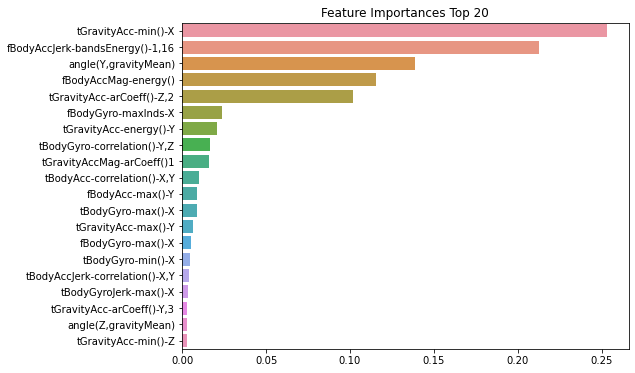

In [ ]:
import seaborn as sns

feature_importance_values = best_df_clf.feature_importances_
# Top 중요도로 정렬하고, 쉽게 시각화하기 위해 Series 변환
feature_importances = pd.Series(feature_importance_values, index=X_train.columns)
# 중요도값 순으로 Series를 정렬
feature_top20 = feature_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=[8, 6])
plt.title('Feature Importances Top 20')
sns.barplot(x=feature_top20, y=feature_top20.index)
plt.show()

### 앙상블(Ensemble) 학습
-앙상블이란 여러 개의 알고리즘을 사용하여, 그 예측을 결합함으로써 보다 정확한 예측을 도출하는 기법  
-집단지성이 힘을 발휘하는 것처럼 단일의 강한 알고리즘보다 복수의 약한 알고리즘이 더 뛰어날 수 있다는 생각에 기반을 둠  
  
-이미지, 영상, 음성 등의 비정형 데이터의 분류는 딥러닝이 뛰어난 성능을 보이지만, 대부분 정형 데이터의 분류에서는 앙상블이 뛰어난 성능을 보이고 있음  
  
-앙상블 학습의 유형은 보팅(Voting), 배깅(Bagging), 부스팅(Boosting), 스태킹(Stacking) 등이 있음  
  
-보팅은 여러 종류의 알고리즘을 사용한 각각의 결과에 대해 투표를 통해 최종 결과를 예측하는 방식  
-배깅은 같은 알고리즘에 대해 데이터 샘플을 다르게 두고 학습을 수행해 보팅을 수행하는 방식  
 이 때의 데이터 샘플은 중첩이 허용됨. 즉 10000개의 데이터에 대해 10개의 알고리즘이 배깅을 사용할 때, 각 1000개의 데이터 내에는 중복된 데이터가 존재할 수 있음. 배깅의 대표적인 방식이 Random Forest  
  
-부스팅은 여러 개의 알고리즘이 순차적으로 학습을 하되, 앞에 학습한 알고리즘 예측이 틀린 데이터에 대해 올바르게 예측할 수 있도록, 그 다음번 알고리즘에 가중치를 부여하여 학습과 예측을 진행하는 방식. 대표적인 방식은 그래디언트 부스트, XGBoost, LightGBM  
  
-마지막으로 스태킹은 여러 가지 다른 모델의 예측 결과값을 다시 학습 데이터로 만들어 다른 모델(메타 모델)로 재학습시켜 결과를 예측하는 방법

![앙상블](img/tree8.png)

#### 하드보팅(Hard Voting)과 소프트보팅(Soft Voting)
-하드보팅을 이용한 분류는 다수결 원칙과 비슷  
-소프트 보팅은 각 알고리즘이 레이블 값 결정 확률을 예측해서, 이것을 평균하여 이들 중 확률이 가장 높은 레이블 값을 최종 값으로 예측  
-일반적으로는 소프트 보팅이 성능이 더 좋아서 많이 적용

![보팅](img/tree9.png)

#### 보팅 분류기(Voting Classifier)
- 사이킷런은 보팅방식의 앙상블을 구현한 VotingClassifier 클래스를 제공  
- 사이킷런에서 제공되는 위스콘신 유방암 데이터 세트를 이용해 보팅방식의 앙상블을 적용

In [ ]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


로지스틱회귀와 KNN을 기반으로 하여 소프트 보팅 방식으로 보팅 분류기를 만들기
- VotingClassifier 클래스를 이용해 보팅분류기 생성  
- 생성인자로 estimators 와 voting 값 입력
- estimators는 리스트값으로 보팅에 사용될 여러 개의 Classifier 객체들을 튜플형식으로 입력
- voting 은 기본값이 hard

In [ ]:
# 보팅 적용을 위한 개별 모델은 로지스틱 회귀와 KNN입니다.
logistic_regression = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=8)

# 개별모델을 소프트보팅 기반의 앙상블 모델로 구현한 분류기
voting_model = VotingClassifier(estimators=[ ('LogisticRegression', logistic_regression), ('KNN', knn)], voting='soft')

# 데이터를 훈련셋과 테스트셋으로 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=156)

# 보팅 분류기의 학습/예측/평가
voting_model.fit(X_train, y_train)
pred = voting_model.predict(X_test)
print('보팅 분류기의 정확도: {0: .4f}'.format(accuracy_score(y_test, pred)))

# 개별 모델의 학습/예측/평가
classifiers = [logistic_regression, knn]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0} 정확도: {1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

보팅 분류기의 정확도:  0.9474
LogisticRegression 정확도: 0.9386
KNeighborsClassifier 정확도: 0.9386


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

### 4. 랜덤 포레스트

배깅(Bagging)은 Bootstrap Aggregating의 약자로, 보팅(Voting)과는 달리 동일한 알고리즘으로 여러 분류기를 만들어 보팅으로 최종 결정하는 알고리즘

**배깅은 다음과 같은 방식으로 진행이 됩니다.

(1) 동일한 알고리즘을 사용하는 일정 수의 분류기 생성  
(2) 각각의 분류기는 부트스트래핑(Bootstrapping)방식으로 생성된 샘플데이터를 학습  
(3) 최종적으로 모든 분류기가 보팅을 통해 예측 결정  

※ 부트스트래핑 샘플링은 전체 데이터에서 일부 데이터의 중첩을 허용하는 방식

랜덤 포레스트는 여러개의 결정 트리 분류기가 전체 데이터에서 배깅방식으로 각자의 데이터를 샘플링해 개별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정

![랜덤포레스트](img/포레스트.png)

부트스트래핑 : 여러개의 데이터 세트를 중청되게 분리하는 것  
랜덤 포레스트의 서브세트 데이터는 부트스트래핑으로 데이터가 임의로 만들어짐  
서브데이터의 데이터 건수는 전체데이터의 건수와 동일하지만 개별데이터가 중첩되어 만들어짐

![부트스트래핑](img/부트스트래핑.png)

사이킷런은 RandomForestClassifier 클래스를 통해 랜덤 포레스트 기반의 분류를 지원

장점
- 결정 트리의 쉽고 직관적인 장점을 그대로 가지고 있음
- 앙상블 알고리즘 중 비교적 빠른 수행 속도를 가지고 있음
- 다양한 분야에서 좋은 성능을 나타냄  

단점
- 하이퍼 파라미터가 많아 튜닝을 위한 시간이 많이 소요됨

#### 사용자 행동 데이터 세트를 이용한 RandomForest 예측

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

In [ ]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, pred)
print('랜덤 포레스트 정확도: {:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.9253


#### 랜덤포레스트 하이퍼 파라미터 튜닝
-랜덤포레스트는 트리기반의 하이퍼 파라미터에 배깅, 부스팅, 학습, 정규화 등을 위한 하이퍼 파라미터까지 추가되므로 튜닝할 파라미터가 많습니다.

n_estimators: 결정트리의 갯수를 지정. Default = 10. 무작정 트리 갯수를 늘리면 성능 좋아지는 것 대비 시간이 걸릴 수 있음  
min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터수. 과적합을 제어하는데 사용. Default = 2(작게 설정할 수록 분할 노드가 많아져 과적합 가능성 증가)  
min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수. min_samples_split과 함께 과적합 제어 용도. 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요  
max_features: 최적의 분할을 위해 고려할 최대 feature 개수. Default = 'auto' (결정트리에서는 default가 none이었음)
- int형으로 지정 →피처 갯수 / float형으로 지정 →비중
- sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정
- log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정  

max_depth: 트리의 최대 깊이. default = None (완벽하게 클래스 값이 결정될 때 까지 분할 또는 데이터 개수가 min_samples_split보다 작아질 때까지 분할)  
- 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요 

max_leaf_nodes: 리프노드의 최대 개수

In [ ]:
# RandomForest의 하이퍼 파라미터 default 상태
model = RandomForestClassifier()
model

RandomForestClassifier()

GridSearchCV를 통한 랜덤포레스트의 하이퍼 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = { 'n_estimators' : [10, 100],
           'max_depth' : [6, 8, 10, 12],
           'min_samples_leaf' : [8, 12, 18],
           'min_samples_split' : [8, 16, 20]
            }

# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state = 0, n_jobs = -1)
grid_cv = GridSearchCV(rf_clf, param_grid = params, cv = 3, n_jobs = -1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터: ', grid_cv.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:  {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 8, 'n_estimators': 100}
최고 예측 정확도: 0.9222


In [ ]:
#위의 결과로 나온 최적 하이퍼 파라미터로 다시 모델을 학습하여 테스트 세트 데이터에서 예측 성능을 측정
rf_clf1 = RandomForestClassifier(n_estimators = 100, 
                                max_depth = 12,
                                min_samples_leaf = 8,
                                min_samples_split = 8,
                                random_state = 0,
                                n_jobs = -1)
rf_clf1.fit(X_train, y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {:.4f}'.format(accuracy_score(y_test,pred)))

예측 정확도: 0.9230


In [ ]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=12, min_samples_leaf=8, \
                                 min_samples_split=8, random_state=0)
rf_clf1.fit(X_train , y_train)
pred = rf_clf1.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test , pred)))

예측 정확도: 0.9199


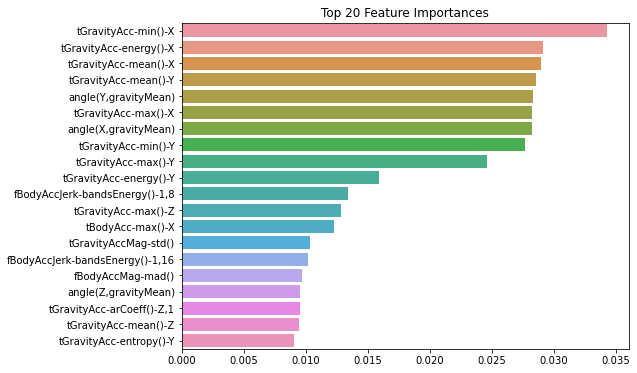

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ftr_importances_values = rf_clf1.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index = X_train.columns)
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Top 20 Feature Importances')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

### 5. Gradient Boost Machine(GBM)

#### Boosting Algorithm  
부스팅 알고리즘은 여러 개의 약한 학습기(weak learner)를 순차적으로 학습-예측하면서 잘못 예측한 데이터에 가중치를 부여해 오류를 개선해나가며 학습하는 방식

부스팅 알고리즘은 대표적으로 아래와 같은 알고리즘들이 있음  
-AdaBoost  
-Gradient Booting Machine(GBM)  
-XGBoost  
-LightGBM  
-CatBoost  

#### AdaBoost  
-Adaptive Boost의 줄임말로서 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하는 대표적인 알고리즘  
-속도나 성능적인 측면에서 decision tree를 약한 학습기로 사용함

![ada](img/ada.png)

Step 1) 첫 번째 약한 학습기가 첫번째 분류기준(D1)으로 + 와 - 를 분류  
Step 2) 잘못 분류된 데이터에 대해 가중치를 부여(두 번쨰 그림에서 커진 + 표시)  
Step 3) 두 번째 약한 학습기가 두번째 분류기준(D2)으로 +와 - 를 다시 분류  
Step 4) 잘못 분류된 데이터에 대해 가중치를 부여(세 번째 그림에서 커진 - 표시)  
Step 5) 세 번째 약한 학습기가 세번째 분류기준으로(D3) +와 -를 다시 분류해서 오류 데이터를 찾음  
Step 6) 마지막으로 분류기들을 결합하여 최종 예측 수행  

→ 약한 학습기를 순차적으로 학습시켜, 개별 학습기에 가중치를 부여하여 모두 결합함으로써 개별 약한 학습기보다 높은 정확도의 예측 결과를 만듦

![가중치](img/tree10.jpg)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score

clf = AdaBoostClassifier(n_estimators=30, 
                        random_state=10, 
                        learning_rate=0.1)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}'.format(accuracy_score(y_test, pred)))

AdaBoost 정확도: 0.7720


#### AdaBoost의 하이퍼파라미터  

base_estimators: 학습에 사용하는 알고리즘. Default = None. DecisionTreeClassifier(max_depth=1)가 적용  
n_estimators: 생성할 약한 학습기의 갯수를 지정. Default = 50  
learning_rate: 학습을 진행할 때마다 적용하는 학습률(0~1). Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수. Default = 1.0  

-n_estimators를 늘린다면 생성하는 weak learner의 수는 늘어남. 이 여러 학습기들의 decision boundary가 많아지면서 모델이 복잡해짐  
-learning_rate을 줄인다면 가중치 갱신의 변동폭이 감소해서, 여러 학습기들의 decision boundary 차이가 줄어듦  
-위의 두 가지는 trade-off 관계  
-n_estimators(또는 learning_rate)를 늘리고, learning_rate(또는 n_estimators)을 줄인다면 서로 효과가 상쇄→ 때문에 이 두 파라미터를 잘 조정하는 것이 알고리즘의 핵심

#### GBM의 학습 방식  
-AdaBoost와 유사하지만, 가중치 업데이트를 경사하강법(Gradient Descent)를 이용하여 최적화된 결과를 얻는 알고리즘  
-GBM은 예측 성능이 높지만 Greedy Algorithm으로 과적합이 빠르게되고, 시간이 오래 걸린다는 단점이 있습니다.

경사하강법  
-분류의 실제값을 y, 피처에 기반한 예측함수를 F(x), 오류식을 h(x) = y-F(x)라고 하면 이 오류식을 최소화하는 방향성을 가지고 가중치 값을 업데이트  
-반복 수행을 통해 오류를 최소화할 수 있도록 가중치의 업데이트 값을 도출하는 기법  

Greedy Algorithm(탐욕 알고리즘)  
-미래를 생각하지 않고 각 단계에서 가장 최선의 선택을 하는 기법으로,  
-각 단계에서 최선의 선택을 한 것이 전체적으로도 최선이길 바라는 알고리즘  
-물론 모든 경우에서 그리디 알고리즘이 통하지는 않습니다.가령 지금 선택하면 1개의 마시멜로를 받고, 1분 기다렸다 선택하면 2개의 마시멜로를 받는 문제에서는,그리디 알고리즘을 사용하면 항상 마시멜로를 1개밖에 받지 못함. 지금 당장 최선의 선택은 마시멜로 1개를 받는 거지만, 결과적으로는 1분 기다렸다가 2개 받는 게 최선이기 때문.

GBM 은 CART 기반의 다른 알고리즘과 마찬가지로 분류는 물론이고 회귀도 가능  
사이킷런은 GBM 기반의 분류를 위해 GradientBoostingClassifier 클래스를 제공

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time
import warnings
warnings.filterwarnings('ignore')

X_train, X_test, y_train, y_test = get_human_dataset()

# GBM 수행 시간 측정을 위함. 시작 시간 설정.
start_time = time.time()

gb_clf = GradientBoostingClassifier(random_state=0)
gb_clf.fit(X_train , y_train)
gb_pred = gb_clf.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)

print('GBM 정확도: {0:.4f}'.format(gb_accuracy))
print("GBM 수행 시간: {0:.1f} 초 ".format(time.time() - start_time))


GBM 정확도: 0.9389
GBM 수행 시간: 447.1 초 


### GBM의 하이퍼 파라미터 및 튜닝

Tree에 관한 하이퍼 파라미터  
-max_depth: 트리의 최대 깊이. default = 3. 깊이가 깊어지면 과적합될 수 있으므로 적절히 제어 필요  
-min_samples_split: 노드를 분할하기 위한 최소한의 샘플 데이터수. 과적합을 제어하는데 사용. Default = 2  
-min_samples_leaf: 리프노드가 되기 위해 필요한 최소한의 샘플 데이터수. min_samples_split과 함께 과적합 제어 용도. default = 1. 불균형 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 작게 설정 필요  
-max_features: 최적의 분할을 위해 고려할 최대 feature 개수. Default = 'none' → 모든 피처 사용. int형으로 지정 →피처 갯수 / float형으로 지정 →비중/ sqrt 또는 auto : 전체 피처 중 √(피처개수) 만큼 선정 / log : 전체 피처 중 log2(전체 피처 개수) 만큼 선정  
-max_leaf_nodes: 리프노드의 최대 개수. default = None → 제한없음

Boosting에 관한 하이퍼파라미터  
-loss: 경사하강법에서 사용할 cost function 지정. 특별한 이유가 없으면 default 값인 deviance 적용  
-n_estimators: 생성할 트리의 갯수를 지정. Default = 100. 많을소록 성능은 좋아지지만 시간이 오래 걸림  
-learning_rate: 학습을 진행할 때마다 적용하는 학습률(0-1).  Weak learner가 순차적으로 오류 값을 보정해나갈 때 적용하는 계수. default = 0.1. 낮은 만큼 최소 오류 값을 찾아 예측성능이 높아질 수 있음. 하지만 많은 수의 트리가 필요하고 시간이 많이 소요  
-subsample: 개별 트리가 학습에 사용하는 데이터 샘플링 비율(0~1). default=1 (전체 데이터 학습). 이 값을 조절하여 트리 간의 상관도를 줄일 수 있음. 

GridSearchCV를 통한 GBM의 하이퍼파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100, 500],
    'learning_rate' : [ 0.05, 0.1]
}
grid_cv = GridSearchCV(gb_clf , param_grid=params , cv=2 ,verbose=1)
grid_cv.fit(X_train , y_train)
print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 4 candidates, totalling 8 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
# GridSearchCV를 이용해 최적으로 학습된 estimators로 예측 수행
gb_pred = grid_cv.best_estimator_.predict(X_test)
gb_accuracy = accuracy_score(y_test, gb_pred)
print('GBM 정확도: {0:.4f}'.format(gb_accuracy))

### 6. XGBoost(eXtra Gradient Boost)  
XGBoost의 개요  
-트리 기반의 알고리즘의 앙상블 학습에서 각광받는 알고리즘 중 하나  
-<span style="color:red">GBM에 기반하고 있지만, GBM의 단점인 느린 수행시간, 과적합 규제 등을 해결한 알고리즘 </span> 

XGBoost의 주요 장점  
- 뛰어난 예측 성능  
- GBM 대비 빠른 수행 시간  
- 과적합 규제(Overfitting Regularization)  
- Tree pruning(트리 가지치기) : 긍정 이득이 없는 분할을 가지치기해서 분할 수를 줄임  
- 자체 내장된 교차 검증 : 반복 수행시마다 내부적으로 교차검증을 수행해 최적회된 반복 수행횟수를 가질 수 있음. 지정된 반복횟수가 아니라 교차검증을 통해 평가 데이트세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 기능이 있음  
- 결손값 자체 처리

XGBoost는 독자적인 XGBoost 모듈과 사이킷런 프레임워크 기반의 모듈이 존재  
독자적인 모듈은 고유의 API와 하이퍼파라미터를 사용하지만, 사이킷런 기반 모듈에서는 다른 Estimator와 동일한 사용법을 가지고 있음

XGBoost 설치  
-관리자 권한으로 command 창 열고,  
-conda install -c anaconda py-xgboost 입력하고, Proceed에서 y 입력

In [ ]:
conda install -c anaconda py-xgboost 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - py-xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  anaconda
    conda-22.11.1              |   py39haa95532_4         892 KB
    libxgboost-1.5.0           |       hd77b12b_1         2.3 MB  anaconda
    py-xgboost-1.5.0           |   py39haa95532_1         166 KB  anaconda
    ------------------------------------------------------------
                                           Total:         3.3 MB

The following NEW packages will be INSTALLED:

  _py-xgboost-mutex  anaconda/win-64::_py-xgboost-mutex-2.0-cpu_0 
  libxgboost         anaconda/win-64::libxgboost-1.5.0-hd77b12b_1 
  py-xgboost         anaconda/win-64::py-xgboost-1.5.0-py39haa95532_1 

The following packages will

In [ ]:
import xgboost

print(xgboost.__version__)

1.5.0


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


XGBoost의 하이퍼 파라미터  
-일반 파라미터: 일반적으로 실행 시 스레드의 개수나 silent 모드 등의 선택을 위한 파라미터, default 값을 바꾸는 일은 거의 없음  
-부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련 파라미터 등을 지칭  
-학습태스크 파라미터: 학습 수행 시의 객체 함수, 평가를 위한 지표 등을 설정하는 파라미터  
 
주요 일반 파라미터  
-booster: gbtree(tree based model) 또는 gblinear(linear model) 중 선택. Default = 'gbtree'  
-silent: Default = 0. 출력 메시지를 나타내고 싶지 않을 경우 1로 설정.  
-nthread: CPU 실행 스레드 개수 조정. Default는 전체 다 사용하는 것. 멀티코어/스레드 CPU 시스템에서 일부CPU만 사용할 때 변경  

-주요 부스터 파라미터: 트리 최적화, 부스팅, regularization 등과 관련된 파라미터를 지칭 

|파라미터명(파이썬 래퍼)|파라미터명(사이킷런 래퍼)|설명|  
|:------:|:------:|:------------|  
|eta(0.3)|	learning rate(0.1)|	-GBM의 learning rate와 같은 파라미터 <br> -범위: 0 ~ 1|   
|num_boost_around(10)|n_estimators(100)|-생성할 weak learner의 수|   
|min_child_weight(1)|min_child_weight(1)|-GBM의 min_samples_leaf와 유사 <br> -관측치에 대한 가중치 합의 최소를 말하지만 GBM에서는 관측치 수에 대한 최소를 의미 <br> -과적합 조절 용도 <br>-범위: 0 ~ ∞|   
|gamma(0)|min_split_loss(0)|-리프노드의 추가분할을 결정할 최소손실 감소값 <br>-해당값보다 손실이 크게 감소할 때 분리 <br>-값이 클수록 과적합 감소효과 <br> -범위: 0 ~ ∞|   
|max_depth(6)|max_depth(3)|	-트리 기반 알고리즘의 max_depth와 동일<br>-0을 지정하면 깊이의 제한이 없음 <br>-너무 크면 과적합(통상 3~10정도 적용)<br>-범위: 0 ~ ∞|
|sub_sample(1)|	subsample(1)|-GBM의 subsample과 동일 <br>-데이터 샘플링 비율 지정(과적합 제어) <br> -일반적으로 0.5~1 사이의 값을 사용 <br>-범위: 0 ~ 1|   
|colsample_bytree(1)|colsample_bytree(1)|-GBM의 max_features와 유사 <br>-트리 생성에 필요한 피처의 샘플링에 사용 <br>-피처가 많을 때 과적합 조절에 사용 <br>-범위: 0 ~ 1|   
|lambda(1)|	reg_lambda(1)|-L2 Regularization 적용 값 <br> -피처 개수가 많을 때 적용을 검토 <br> -클수록 과적합 감소 효과|   
|alpha(0) |	reg_alpha(0) | -L1 Regularization 적용 값 <br>-피처 개수가 많을 때 적용을 검토<br>-클수록 과적합 감소 효과|   
|scale_pos_weight(1)|scale_pos_weight(1)|-불균형 데이터셋의 균형을 유지|   
  
  

학습 태스크 파라미터: 학습 수행 시의 객체함수, 평가를 위한 지표 등을 설정하는 파라미터  

-objective: ‘reg:linear’(회귀), binary:logistic(이진분류), multi:softmax(다중분류, 클래스 반환), multi:softprob(다중분류, 확률반환)  
-eval_metric: 검증에 사용되는 함수정의, 회귀 분석인 경우 'rmse'를, 클래스 분류 문제인 경우 'error'
- rmse: Root Mean Squared Error  
- mae: mean absolute error  
- logloss: Negative log-likelihood
- error: binary classification error rate
- merror: multiclass classification error rate
- mlogloss: Multiclass logloss
- auc: Area Under Curve

과적합 제어  
-eta 값을 낮춤(0.01 ~ 0.1) → eta 값을 낮추면 num_boost_round(n_estimator)를 반대로 높여주어야 함  
-max_depth 값을 낮춤  
-min_child_weight 값을 높임  
-gamma 값을 높임  
-subsample과 colsample_bytree를 낮춤  

Early Stopping 기능 :  
-GBM의 경우 n_estimators에 지정된 횟수만큼 학습을 끝까지 수행하지만, XGB의 경우 오류가 더 이상 개선되지 않으면 수행을 중지  
-n_estimators 를 200으로 설정하고, 조기 중단 파라미터 값을 50으로 설정하면, 1부터 200회까지 부스팅을 반복하다가 50회를 반복하는 동안 학습오류가 감소하지 않으면 더 이상 부스팅을 진행하지 않고 종료 (가령 100회에서 학습오류 값이 0.8인데 101~150회 반복하는 동안 예측 오류가 0.8보다 작은 값이 하나도 없으면 부스팅을 종료)

#### 파이썬 래퍼 XGBoost 적용
위스콘신 유방암 데이터 세트를 활용한 API 사용법
- 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성 종양(malignant)인지 양성 종양(benign)인지를 분류


In [ ]:
import xgboost as xgb ## XGBoost 불러오기
from xgboost import plot_importance ## Feature Importance를 불러오기 위함
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import warnings
warnings.filterwarnings('ignore')

dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

cancer_df = pd.DataFrame(data=X_features, columns = dataset.feature_names)
cancer_df['target'] = y_label
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


위의 데이터셋에서 악성종양은 0, 양성은 1 값으로 되어 있음

In [ ]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
# 전체 데이터셋을 학습용 80%, 테스트용 20%로 분할
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


파이썬래퍼 XGBoost와 사이킷런래퍼 XGBoost의 가장 큰 차이는
파이썬래퍼는 학습용과 테스트 데이터 세트를 위해 별도의 DMatrix를 생성한다는 것.
DMatrix : 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트

- 주요 입력 파라미터는 data(피처 데이터 세트)와 label(분류: 레이블 데이터 세트/회귀: 숫자형인 종속값 데이터 세트)
- 판다스의 DataFrame으로 데이터 인터페이스를 하기 위해서는 DataFrame.values를 이용해 넘파이로 일차변환 한 뒤에 DMatrix 변환을 적용

In [ ]:
# 넘파이 형태의 학습 데이터 세트와 테스트 데이터를 DMatrix로 변환하는 예제
dtrain = xgb.DMatrix(data=X_train, label = y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

params = {'max_depth' : 3,
         'eta' : 0.1, 
         'objective' : 'binary:logistic',
         'eval_metric' : 'logloss',
         'early_stoppings' : 100 }

num_rounds = 400

파이썬래퍼 XGBoost에서 하이퍼 파라미터를 xgboost 모듈의 train( ) 함수에 파라미터로 전달(사이킷런 래퍼는 Estimator 생성자를 하이퍼 파라미터로 전달)

early_stopping_rounds 파라미터 : 조기 중단을 위한 라운드를 설정. 조기 중단 기능 수행을 위해서는 반드시 eval_set과 eval_metric이 함께 설정되어야 함

- eval_set : 성능평가를 위한 평가용 데이터 세트를 설정
- eval_metric : 평가 세트에 적용할 성능 평가 방법(반복마다 eval_set으로 지정된 데이터 세트에서 eval_metric의 지정된 평가 지표로 예측 오류를 측정)

train() 함수를 호출하면 xgboost가 반복 시마다 evals에 표시된 데이터 세트에 대해 평가 지표를 출력. 그 후 학습이 완료된 모델 객체를 반환

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval' 로 명기
wlist = [(dtrain, 'train'), (dtest,'eval')]
# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)

[00:27:27] WARNING: ..\src\learner.cc:541: 
Parameters: { early_stoppings } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	train-logloss:0.60969	eval-logloss:0.61352
[1]	train-logloss:0.54080	eval-logloss:0.54784
[2]	train-logloss:0.48375	eval-logloss:0.49425
[3]	train-logloss:0.43446	eval-logloss:0.44799
[4]	train-logloss:0.39055	eval-logloss:0.40911
[5]	train-logloss:0.35414	eval-logloss:0.37498
[6]	train-logloss:0.32122	eval-logloss:0.34571
[7]	train-logloss:0.29259	eval-logloss:0.32053
[8]	train-logloss:0.26747	eval-logloss:0.29721
[9]	train-logloss:0.24515	eval-logloss:0.27799
[10]	train-logloss:0.22569	eval-logloss:0.26030
[11]	train-logloss:0.20794	eval-logloss:0.24604
[12]	train-logloss:0.19218	eval-logloss:0.23156
[13]	train-logloss:0.17792	eval-logloss:0.22005
[14

[163]	train-logloss:0.00722	eval-logloss:0.08778
[164]	train-logloss:0.00720	eval-logloss:0.08778
[165]	train-logloss:0.00718	eval-logloss:0.08752
[166]	train-logloss:0.00716	eval-logloss:0.08754
[167]	train-logloss:0.00714	eval-logloss:0.08764
[168]	train-logloss:0.00712	eval-logloss:0.08739
[169]	train-logloss:0.00710	eval-logloss:0.08738
[170]	train-logloss:0.00708	eval-logloss:0.08730
[171]	train-logloss:0.00707	eval-logloss:0.08737
[172]	train-logloss:0.00705	eval-logloss:0.08740
[173]	train-logloss:0.00703	eval-logloss:0.08739
[174]	train-logloss:0.00701	eval-logloss:0.08713
[175]	train-logloss:0.00699	eval-logloss:0.08716
[176]	train-logloss:0.00697	eval-logloss:0.08696
[177]	train-logloss:0.00696	eval-logloss:0.08705
[178]	train-logloss:0.00694	eval-logloss:0.08697
[179]	train-logloss:0.00692	eval-logloss:0.08697
[180]	train-logloss:0.00690	eval-logloss:0.08704
[181]	train-logloss:0.00688	eval-logloss:0.08680
[182]	train-logloss:0.00687	eval-logloss:0.08683
[183]	train-logloss:

[331]	train-logloss:0.00532	eval-logloss:0.08589
[332]	train-logloss:0.00532	eval-logloss:0.08592
[333]	train-logloss:0.00531	eval-logloss:0.08584
[334]	train-logloss:0.00531	eval-logloss:0.08574
[335]	train-logloss:0.00530	eval-logloss:0.08582
[336]	train-logloss:0.00529	eval-logloss:0.08589
[337]	train-logloss:0.00529	eval-logloss:0.08594
[338]	train-logloss:0.00528	eval-logloss:0.08583
[339]	train-logloss:0.00528	eval-logloss:0.08591
[340]	train-logloss:0.00527	eval-logloss:0.08583
[341]	train-logloss:0.00526	eval-logloss:0.08573
[342]	train-logloss:0.00526	eval-logloss:0.08568
[343]	train-logloss:0.00525	eval-logloss:0.08572
[344]	train-logloss:0.00525	eval-logloss:0.08580
[345]	train-logloss:0.00524	eval-logloss:0.08582
[346]	train-logloss:0.00524	eval-logloss:0.08571
[347]	train-logloss:0.00523	eval-logloss:0.08579
[348]	train-logloss:0.00523	eval-logloss:0.08583
[349]	train-logloss:0.00522	eval-logloss:0.08573
[350]	train-logloss:0.00522	eval-logloss:0.08566
[351]	train-logloss:

train( ) 을 통해 학습을 수행하면 반복시 train-logloss와 eval-logloss가 지속적으로 감소.  
xgboost를 이용해 학습이 완료됐으면 predict() 메서드를 이용해 예측을 수행. 여기서 파이썬 래퍼는 예측 결과를 추정할 수 있는 확률 값을 반환.(반면 사이킷런 래퍼는 클래스 값을 반환)

In [ ]:
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10], 3))

# 예측 확률이 0.5보다 크면 1, 그렇지 않으면 0으로 예측값 결정해 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시: ', preds[:10])

predict() 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[0.95  0.003 0.9   0.086 0.993 1.    1.    0.999 0.998 0.   ]
예측값 10개만 표시:  [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [ ]:
# 혼동행렬, 정확도, 정밀도, 재현율, F1, AUC 불러오기
def get_clf_eval(y_test, y_pred):
    confusion = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    F1 = f1_score(y_test, y_pred)
    AUC = roc_auc_score(y_test, y_pred)
    print('오차행렬:\n', confusion)
    print('\n정확도: {:.4f}'.format(accuracy))
    print('정밀도: {:.4f}'.format(precision))
    print('재현율: {:.4f}'.format(recall))
    print('F1: {:.4f}'.format(F1))
    print('AUC: {:.4f}'.format(AUC))

In [ ]:
get_clf_eval(y_test, preds)

오차행렬:
 [[35  2]
 [ 1 76]]

정확도: 0.9737
정밀도: 0.9744
재현율: 0.9870
F1: 0.9806
AUC: 0.9665


Feature importance를 시각화할 때,  
→ 기본 평가 지료로 f1스코어를 기반으로 각 feature의 중요도를 나타냄  
→ 사이킷런 래퍼는 estimator 객체의 featureimportances 속성을 이용해 시각화 코드를 직접 작성해야 함  
→ 반면, 파이썬 래퍼는 plot_importance()를 이용해 바로 피처 중요 코드를 시각화 할 수 있음

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

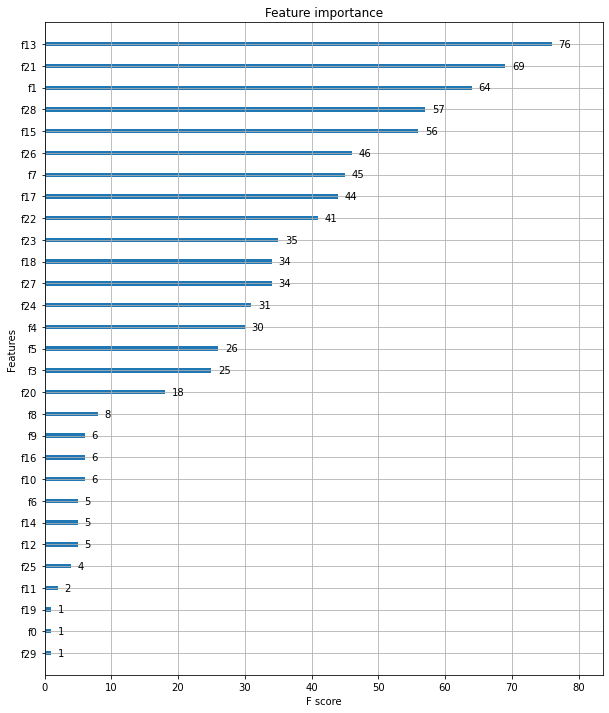

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

다만, xgboost 넘파이 기반의 피처 데이터로 학습 시에 피처명을 제대로 알 수 없으므로 피처별로 f자 뒤에 순서를 붙여 X축에 피처들로 나열(f0는 첫번째 피처, f1는 두번째 피처를 의미)

#### 파이썬 래퍼의 교차 검증 수행 및 최적 파라미터 구하기
: xgboost는 사이킷런의 GridSearchCV와 유사하게 cv( )를 API로 제공

xgb.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(),obj=None, feval=None, maximize=False,
early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

- params(dict): 부스터 파라미터
- dtrain(DMatrix) : 학습 데이터
- num_boost_round(int) : 부스팅 반복횟수
- nfold(int) : CV폴드 개수
- stratified(bool) : CV수행시 샘플을 균등하게 추출할지 여부
- metrics(string or list of strings) : CV 수행시 모니터링할 성능 평가 지표
- early_stopping_rounds(int) : 조기중단을 활성화시킴. 반복횟수 지정

xgv.cv의 반환 값은 데이터프레임 형태

### 사이킷런 래퍼 XGBoost의 개요 및 적용
특징
- 사이킷런의 기본 Estimator를 이용해 만들어 fit()과 predict()만으로 학습과 예측이 가능
- GridSearchCV,Pipeline 등 사이킷런의 유틸리티를 그대로 사용 가능
- 분류 : XGBClassifier / 회귀 : XGBRegressor

파이썬 래퍼와 비교시 달라진 파라미터
- eta → learning_rate
- sub_sample → subsample
- lambda → reg_lambda
- alpha → reg_alpha
- num_boost_round → n_estimators  

위와 동일하게 위스콘신 유방암 데이터를 통한 예측

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 부스팅 반복횟수는 400

from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth = 3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
# 예측 결과 확인
get_clf_eval(y_test, w_preds)

[01:40:35] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
오차행렬:
 [[35  2]
 [ 1 76]]

정확도: 0.9737
정밀도: 0.9744
재현율: 0.9870
F1: 0.9806
AUC: 0.9665


앞선 파이썬 래퍼 XGBoost와 동일한 결과가 나옴  

사이킷런 래퍼 XGBoost에서도 조기 중단 기능을 수행할 수 있는데 fit( )에 해당 파라미터를 입력하면 됨  
→ early_stopping_rounds, eval_metrics, eval_set

In [ ]:
# max_depth = 3, 학습률은 0.1, 예제가 이진분류이므로 목적함수(objective)는 binary:logistic(이진 로지스틱)
# 오류함수의 평가성능지표는 logloss
# 부스팅 반복횟수는 400
# 조기중단을 위한 최소 반복횟수는 100

# 아래 예제에서는 평가를 위한 데이터 세트로 테스트 데이터 세트를 사용했지만, 바람직하진 않습니다.
# 테스트 데이터 세트는 학습에 완전히 알려지지 않은 데이터 세트를 사용해야 합니다.
# 평가에 테스트 데이터 세트를 사용하면 학습시에 미리 참고가 되어 과적합할 수 있기 때문입니다.

xgb_wrapper = XGBClassifier(n_estimators = 400, learning_rate = 0.1 , max_depth = 3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 100, 
                eval_metric="logloss", eval_set = evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

[238]	validation_0-logloss:0.08639
[239]	validation_0-logloss:0.08634
[240]	validation_0-logloss:0.08618
[241]	validation_0-logloss:0.08619
[242]	validation_0-logloss:0.08625
[243]	validation_0-logloss:0.08626
[244]	validation_0-logloss:0.08629
[245]	validation_0-logloss:0.08622
[246]	validation_0-logloss:0.08640
[247]	validation_0-logloss:0.08635
[248]	validation_0-logloss:0.08628
[249]	validation_0-logloss:0.08645
[250]	validation_0-logloss:0.08629
[251]	validation_0-logloss:0.08631
[252]	validation_0-logloss:0.08636
[253]	validation_0-logloss:0.08639
[254]	validation_0-logloss:0.08649
[255]	validation_0-logloss:0.08644
[256]	validation_0-logloss:0.08629
[257]	validation_0-logloss:0.08646
[258]	validation_0-logloss:0.08639
[259]	validation_0-logloss:0.08644
[260]	validation_0-logloss:0.08646
[261]	validation_0-logloss:0.08649
[262]	validation_0-logloss:0.08644
[263]	validation_0-logloss:0.08647
[264]	validation_0-logloss:0.08632
[265]	validation_0-logloss:0.08649
[266]	validation_0-l

위의 결과에서는 211번 반복시 logloss가 0.085593 이었는데 이후 100번 반복되는 311번째까지 성능평가 지수가 향상되지 않았기 때문에 더 이상 반복하지 않고 멈추게 됨

In [ ]:
get_clf_eval(y_test, ws100_preds)

오차행렬:
 [[34  3]
 [ 1 76]]

정확도: 0.9649
정밀도: 0.9620
재현율: 0.9870
F1: 0.9744
AUC: 0.9530


조기 중단값을 너무 급격하게 줄이면 성능이 향상될 여지가 있음에도 학습을 멈춰 예측 성능이 저하될 수 있음

In [ ]:
# early_stopping_rounds = 10 으로 설정하고 재학습
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds = 10, 
                eval_metric='logloss', eval_set=evals , verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
get_clf_eval(y_test, ws10_preds)

[0]	validation_0-logloss:0.61352
[1]	validation_0-logloss:0.54784
[2]	validation_0-logloss:0.49425
[3]	validation_0-logloss:0.44799
[4]	validation_0-logloss:0.40911
[5]	validation_0-logloss:0.37498
[6]	validation_0-logloss:0.34571
[7]	validation_0-logloss:0.32053
[8]	validation_0-logloss:0.29721
[9]	validation_0-logloss:0.27799
[10]	validation_0-logloss:0.26030
[11]	validation_0-logloss:0.24604
[12]	validation_0-logloss:0.23156
[13]	validation_0-logloss:0.22005
[14]	validation_0-logloss:0.20857
[15]	validation_0-logloss:0.19999
[16]	validation_0-logloss:0.19012
[17]	validation_0-logloss:0.18182
[18]	validation_0-logloss:0.17473
[19]	validation_0-logloss:0.16766
[20]	validation_0-logloss:0.15820
[21]	validation_0-logloss:0.15473
[22]	validation_0-logloss:0.14895
[23]	validation_0-logloss:0.14331
[24]	validation_0-logloss:0.13634
[25]	validation_0-logloss:0.13278
[26]	validation_0-logloss:0.12791
[27]	validation_0-logloss:0.12526
[28]	validation_0-logloss:0.11998
[29]	validation_0-loglos

62번째까지만 수행이 되고 종료되었는데, 이렇게 학습된 모델로 예측한 결과, 정확도는 약 0.9561로 ealry_stopping_rounds = 100일 때의 정확도인 0.9649보다 낮게 나옴

모델 예측 후 피처 중요도를 동일하게 plot_importance() API를 통해 시각화

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

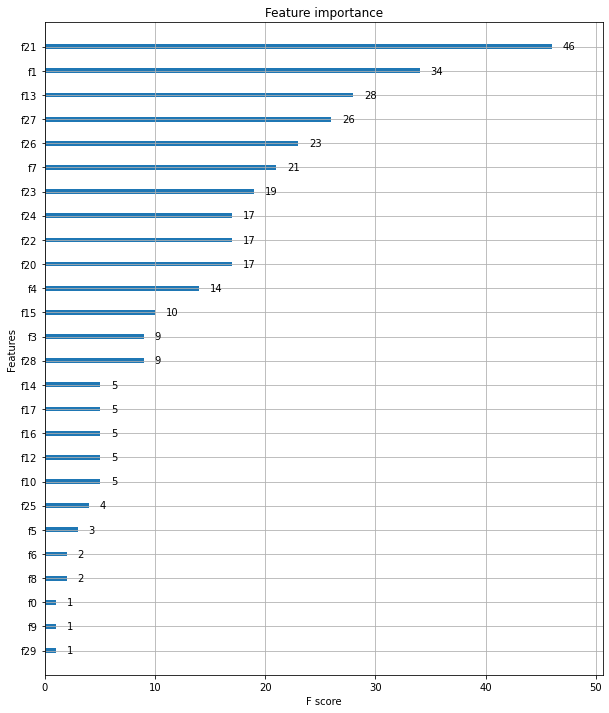

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))

plot_importance(xgb_wrapper, ax=ax)

### 7. LightGBM
LightGBM의 장점
- XGBoost 대비 더 빠른 학습과 예측 수행 시간
- 더 작은 메모리 사용량
- 카테고리형 피처의 자동 변환과 최적 분할: 원-핫인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드분할 수행

LightGBM의 단점
- 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움(공식 문서상 대략 10,000건 이하의 데이터 세트)

기존 GBM과의 차이점: 일반적인 균형트리분할 (Level Wise) 방식과 달리 리프중심 트리분할(Leaf Wise) 방식을 사용

- 균형트리분할은 최대한 균형 잡힌 트리를 유지하며 분할하여 트리의 깊이를 최소화하여 오버피팅에 강한구조이지만 균형을 맞추기 위한 시간이 필요
- 리프중심 트리분할의 경우 최대 손실 값을 가지는 리프노드를 지속적으로 분할하면서 트리가 깊어지고 비대칭적으로 생성. 이로써 예측 오류 손실을 최소화하고자 함
 

![리프](img/LGBM.jpg)

LightGBM 설치  
-Visual Studio Build tool 2015 먼저 설치  
-conda install -c conda-forge lightgbm

#### LightGBM의 하이퍼 파라미터
- XGBoost 와 유사
- 트리의 깊이가 깊어지므로 이러한 특성에 맞는 하이퍼 파라미터 설정이 필요(max_depth 매우 크게 가짐)

주요 파라미터

![lgbm](img/lgbm1.png)

#### 하이퍼 파라미터 튜닝방안
num_leaves의 개수를 중심으로 min_child_sampes(min_data_in_leaf), max_depth를 함께 조절하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안

- num_leaves를 늘리면 정확도가 높아지지만 트리가 깊어지고 과접합되기 쉬움
- min_child_samples(min_data_in_leaf)를 크게 설정하면 트리가 깊어지는 것을 방지
- max_depth는 명시적으로 깊이를 제한. 위의 두 파라미터와 함꼐 과적합을 개선하는데 사용

또한, learning_rate을 줄이면서 n_estimator를 크게하는 것은 부스팅에서의 기본적인 튜닝 방안


#### 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교
![비교](img/비교.jpg)

#### LightGBM 적용 - 위스콘신 유방암 예측


In [ ]:
conda install -c conda-forge lightgbm

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - lightgbm


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.11.1              |   py39hcbf5309_1         908 KB  conda-forge
    lightgbm-3.2.1             |   py39hd77b12b_0         754 KB
    python_abi-3.9             |           2_cp39           4 KB  conda-forge
    ruamel.yaml-0.17.21        |   py39hb82d6ee_1         169 KB  conda-forge
    ruamel.yaml.clib-0.2.6     |   py39h2bbff1b_1         101 KB
    ------------------------------------------------------------
                                           Total:         1.9 MB

The following NEW packages will be INSTALLED:

  lightgbm           pkgs/main/win-64::lightgbm-3.2.1-py39hd77b12b_0 None
  python_abi         conda-forge/win-64::python_abi-3.9-2_cp39 None
  ruamel.yaml      



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 22.11.1

Please update conda by running

    $ conda update -n base -c defaults conda




In [ ]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test=train_test_split(ftr, target, test_size=0.2, random_state=156 )

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정. 
lgbm_wrapper = LGBMClassifier(n_estimators=400)

# LightGBM도 XGBoost와 동일하게 조기 중단 수행 가능. 
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", 
                 eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

[1]	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's binary_logloss: 0.507451
[3]	valid_0's binary_logloss: 0.458489
[4]	valid_0's binary_logloss: 0.417481
[5]	valid_0's binary_logloss: 0.385507
[6]	valid_0's binary_logloss: 0.355773
[7]	valid_0's binary_logloss: 0.329587
[8]	valid_0's binary_logloss: 0.308478
[9]	valid_0's binary_logloss: 0.285395
[10]	valid_0's binary_logloss: 0.267055
[11]	valid_0's binary_logloss: 0.252013
[12]	valid_0's binary_logloss: 0.237018
[13]	valid_0's binary_logloss: 0.224756
[14]	valid_0's binary_logloss: 0.213383
[15]	valid_0's binary_logloss: 0.203058
[16]	valid_0's binary_logloss: 0.194015
[17]	valid_0's binary_logloss: 0.186412
[18]	valid_0's binary_logloss: 0.179108
[19]	valid_0's binary_logloss: 0.174004
[20]	valid_0's binary_logloss: 0.167155
[21]	valid_0's binary_logloss: 0.162494
[22]	valid_0's binary_logloss: 0.156886
[23]	valid_0's binary_logloss: 0.152855
[24]	valid_0's binary_loglo

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 1 76]]
정확도: 0.9561, 정밀도: 0.9500, 재현율: 0.9870,    F1: 0.9682, AUC:0.9905


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

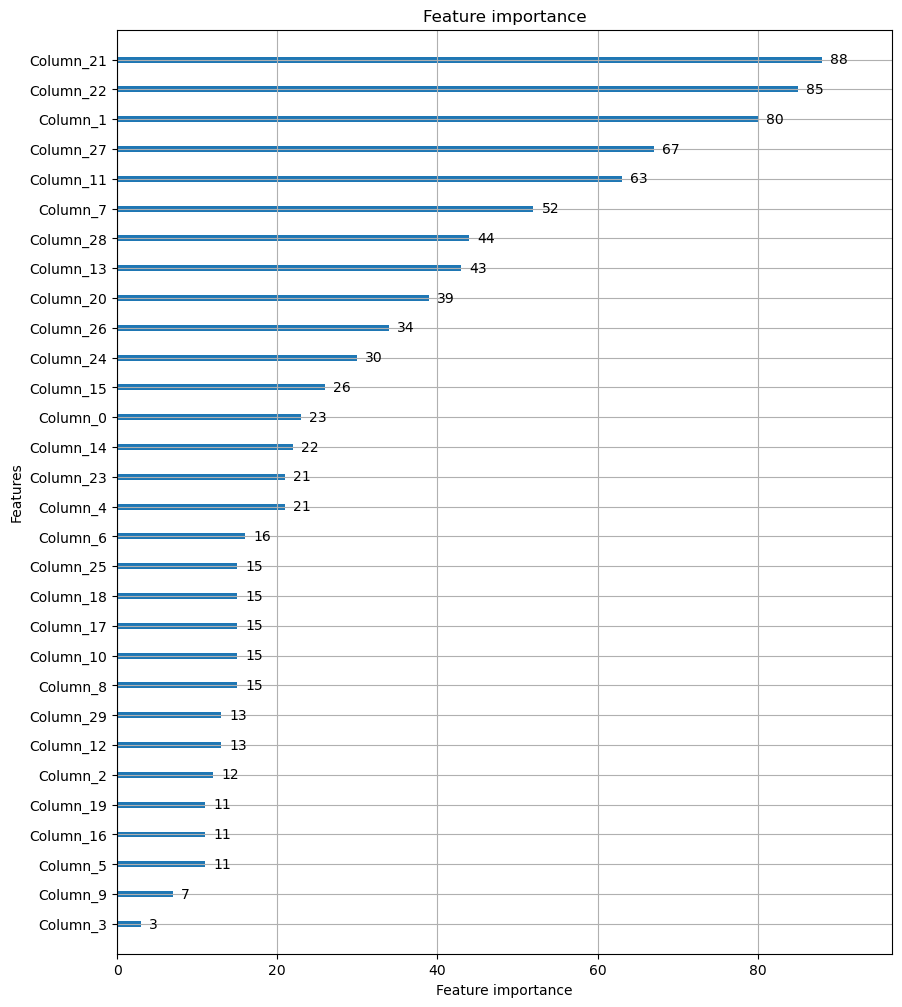

In [ ]:
# plot_importance( )를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

### 8.산탄데르 고객만족 예측
https://www.kaggle.com/c/santander-customer-satisfaction

- 370개의 피처로 이루어진 데이터 세트 기반에서 고객만족 여부를 예측하는 것
- 피처이름은 모두 익명화되어 있어 어떤 속성인지는 알 수 없음
- 클래스 레이블명은 TARGET이며 1이면 불만, 0이면 만족한 고객
- 모델의 성능평가는 ROC-AUC로 평가
- 대부분이 만족이고, 불만족인 데이터는 일부이기 때문에 단순 정확도 수치보다 ROU-AUC가 더 적합
 
고객 만족여부를 XGBoost 와 LightGBM 을 활용하여 예측 

데이터 전처리

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./train/train_santander.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [ ]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [ ]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [ ]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [ ]:
# var3 확인
cust_df['var3'].value_counts(ascending=False).head(10)

 2         74165
 8           138
-999999      116
 9           110
 3           108
 1           105
 13           98
 7            97
 4            86
 12           85
Name: var3, dtype: int64

In [ ]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))

피처 데이터 shape:(76020, 369)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


#### XGBoost 모델 학습과 하이퍼 파라미터 튜닝
- XGBoost로 기본 세팅을 아래와 설정하고, 예측결과를 ROC-AUC로 평가
- n_estimators = 500
- early_stopping_rounds = 100
- eval_metric = 'auc'

평가 데이터세트는 앞에서 분리한 테스트 데이터 세트를 이용  
테스트 데이터 세트를 XGBoost의 평가 데이터 세트로 사용하면 과적합이 될 우려가 있지만, 일단 진행  
eval_set = [(X_train, y_train), (X_test, y_test)]

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.99306	validation_1-auc:0.94752
[1]	validation_0-auc:0.99600	validation_1-auc:0.95209
[2]	validation_0-auc:0.99640	validation_1-auc:0.97473
[3]	validation_0-auc:0.99645	validation_1-auc:0.97490
[4]	validation_0-auc:0.99948	validation_1-auc:0.98561
[5]	validation_0-auc:0.99980	validation_1-auc:0.98350
[6]	validation_0-auc:0.99994	validation_1-auc:0.98333
[7]	validation_0-auc:0.99996	validation_1-auc:0.98491
[8]	validation_0-auc:0.99998	validation_1-auc:0.98877
[9]	validation_0-auc:0.99998	validation_1-auc:0.98736
[10]	validation_0-auc:1.00000	validation_1-auc:0.98736
[11]	validation_0-auc:1.00000	validation_1-auc:0.98631
[12]	validation_0-auc:1.00000	validation_1-auc:0.98842
[13]	validation_0-auc:1.00000	validation_1-auc:0.98807
[14]	validation_0-auc:1.00000	validation_1-auc:0.98842
[15]	validation_0-auc:1.00000	validation_1-auc:0.98772
[16]	validation_0-auc:1.00000	validation_1-auc:0.98912
[17]	validation_0-auc:1.00000	validation_1-auc:0.98947
[18]	validation_0-au

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


다음으론 XGBoost의 하이퍼 파라미터 튜닝을 수행  
- 컬럼의 수가 많아 과적합 가능성을 가정하고, max_depth, min_child_weight, colsample_bytree만 일차적으로 튜닝
- 학습시간이 많이 필요한 ML모델의 경우 2~ 3개 정도의 파라미터를 결합해 최적파라미터를 찾아낸 뒤 이 파라미터를 기반으로 1~2개의 파라미터를 결합해 파라미터 튜닝을 수행하는 것

뒤의 예제 코드에서는 수행시간이 오래 걸리므로 n_estimators = 100, early_stopping_rounds = 30으로 줄여서 테스트

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# cv는 3으로 지정 
gridcv = GridSearchCV(xgb_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.96638	validation_1-auc:0.92840
[1]	validation_0-auc:0.98925	validation_1-auc:0.94735
[2]	validation_0-auc:0.99046	validation_1-auc:0.94823
[3]	validation_0-auc:0.99369	validation_1-auc:0.95964
[4]	validation_0-auc:0.99321	validation_1-auc:0.96894
[5]	validation_0-auc:0.99272	validation_1-auc:0.97139
[6]	validation_0-auc:0.99323	validation_1-auc:0.97052
[7]	validation_0-auc:0.99397	validation_1-auc:0.97210
[8]	validation_0-auc:0.99674	validation_1-auc:0.97245
[9]	validation_0-auc:0.99719	validation_1-auc:0.98017
[10]	validation_0-auc:0.99720	validation_1-auc:0.98543
[11]	validation_0-auc:0.99755	validation_1-auc:0.98508
[12]	validation_0-auc:0.99749	validation_1-auc:0.98613
[13]	validation_0-auc:0.99751	validation_1-auc:0.98631
[14]	validation_0-auc:0.99749	validation_1-auc:0.98772
[15]	validation_0-auc:0.99756	validation_1-auc:0.98877
[16]	validation_0-auc:0.99756	validation_1-auc:0.98877
[17]	validation_0-auc:0.99744	validation_1-auc:0.98877
[18]	validation_0-au

[50]	validation_0-auc:0.99377	validation_1-auc:0.99368
[0]	validation_0-auc:0.97938	validation_1-auc:0.95542


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[1]	validation_0-auc:0.99489	validation_1-auc:0.97876
[2]	validation_0-auc:0.99501	validation_1-auc:0.98052
[3]	validation_0-auc:0.99511	validation_1-auc:0.98982
[4]	validation_0-auc:0.99555	validation_1-auc:0.98842
[5]	validation_0-auc:0.99546	validation_1-auc:0.98982
[6]	validation_0-auc:0.99543	validation_1-auc:0.99052
[7]	validation_0-auc:0.99532	validation_1-auc:0.98982
[8]	validation_0-auc:0.99538	validation_1-auc:0.99052
[9]	validation_0-auc:0.99542	validation_1-auc:0.99087
[10]	validation_0-auc:0.99788	validation_1-auc:0.99123
[11]	validation_0-auc:0.99786	validation_1-auc:0.99123
[12]	validation_0-auc:0.99771	validation_1-auc:0.99193
[13]	validation_0-auc:0.99812	validation_1-auc:0.99193
[14]	validation_0-auc:0.99849	validation_1-auc:0.99052
[15]	validation_0-auc:0.99841	validation_1-auc:0.99087
[16]	validation_0-auc:0.99835	validation_1-auc:0.99193
[17]	validation_0-auc:0.99829	validation_1-auc:0.99263
[18]	validation_0-auc:0.99865	validation_1-auc:0.99263
[19]	validation_0-a

[13]	validation_0-auc:0.99415	validation_1-auc:0.99193
[14]	validation_0-auc:0.99354	validation_1-auc:0.99298
[15]	validation_0-auc:0.99356	validation_1-auc:0.99298
[16]	validation_0-auc:0.99355	validation_1-auc:0.99368
[17]	validation_0-auc:0.99377	validation_1-auc:0.99298
[18]	validation_0-auc:0.99361	validation_1-auc:0.99368
[19]	validation_0-auc:0.99347	validation_1-auc:0.99333
[20]	validation_0-auc:0.99337	validation_1-auc:0.99403
[21]	validation_0-auc:0.99325	validation_1-auc:0.99474
[22]	validation_0-auc:0.99308	validation_1-auc:0.99438
[23]	validation_0-auc:0.99300	validation_1-auc:0.99403
[24]	validation_0-auc:0.99286	validation_1-auc:0.99474
[25]	validation_0-auc:0.99292	validation_1-auc:0.99544
[26]	validation_0-auc:0.99290	validation_1-auc:0.99509
[27]	validation_0-auc:0.99292	validation_1-auc:0.99474
[28]	validation_0-auc:0.99296	validation_1-auc:0.99474
[29]	validation_0-auc:0.99292	validation_1-auc:0.99438
[30]	validation_0-auc:0.99298	validation_1-auc:0.99403
[31]	valid

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[12]	validation_0-auc:0.99784	validation_1-auc:0.99333
[13]	validation_0-auc:0.99818	validation_1-auc:0.99368
[14]	validation_0-auc:0.99833	validation_1-auc:0.99333
[15]	validation_0-auc:0.99835	validation_1-auc:0.99403
[16]	validation_0-auc:0.99847	validation_1-auc:0.99438
[17]	validation_0-auc:0.99843	validation_1-auc:0.99474
[18]	validation_0-auc:0.99871	validation_1-auc:0.99438
[19]	validation_0-auc:0.99890	validation_1-auc:0.99474
[20]	validation_0-auc:0.99892	validation_1-auc:0.99474
[21]	validation_0-auc:0.99896	validation_1-auc:0.99474
[22]	validation_0-auc:0.99910	validation_1-auc:0.99474
[23]	validation_0-auc:0.99910	validation_1-auc:0.99474
[24]	validation_0-auc:0.99906	validation_1-auc:0.99474
[25]	validation_0-auc:0.99918	validation_1-auc:0.99474
[26]	validation_0-auc:0.99910	validation_1-auc:0.99474
[27]	validation_0-auc:0.99908	validation_1-auc:0.99474
[28]	validation_0-auc:0.99912	validation_1-auc:0.99474
[29]	validation_0-auc:0.99908	validation_1-auc:0.99474
[30]	valid

[62]	validation_0-auc:0.99818	validation_1-auc:0.99052
[63]	validation_0-auc:0.99812	validation_1-auc:0.99052
[64]	validation_0-auc:0.99814	validation_1-auc:0.99052
[65]	validation_0-auc:0.99814	validation_1-auc:0.99052
[66]	validation_0-auc:0.99812	validation_1-auc:0.99052
[67]	validation_0-auc:0.99818	validation_1-auc:0.99052
[68]	validation_0-auc:0.99818	validation_1-auc:0.99052
[69]	validation_0-auc:0.99814	validation_1-auc:0.99052
[70]	validation_0-auc:0.99814	validation_1-auc:0.99052
[71]	validation_0-auc:0.99814	validation_1-auc:0.99087
[72]	validation_0-auc:0.99816	validation_1-auc:0.99087
[73]	validation_0-auc:0.99818	validation_1-auc:0.99123
[74]	validation_0-auc:0.99822	validation_1-auc:0.99123
[75]	validation_0-auc:0.99816	validation_1-auc:0.99123
[76]	validation_0-auc:0.99825	validation_1-auc:0.99123
[77]	validation_0-auc:0.99822	validation_1-auc:0.99123
[78]	validation_0-auc:0.99825	validation_1-auc:0.99123
[79]	validation_0-auc:0.99825	validation_1-auc:0.99123
[80]	valid

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[1]	validation_0-auc:0.99489	validation_1-auc:0.97876
[2]	validation_0-auc:0.99501	validation_1-auc:0.98052
[3]	validation_0-auc:0.99511	validation_1-auc:0.98982
[4]	validation_0-auc:0.99555	validation_1-auc:0.98842
[5]	validation_0-auc:0.99546	validation_1-auc:0.98982
[6]	validation_0-auc:0.99543	validation_1-auc:0.99052
[7]	validation_0-auc:0.99532	validation_1-auc:0.98982
[8]	validation_0-auc:0.99538	validation_1-auc:0.99052
[9]	validation_0-auc:0.99542	validation_1-auc:0.99087
[10]	validation_0-auc:0.99788	validation_1-auc:0.99123
[11]	validation_0-auc:0.99786	validation_1-auc:0.99123
[12]	validation_0-auc:0.99771	validation_1-auc:0.99193
[13]	validation_0-auc:0.99812	validation_1-auc:0.99193
[14]	validation_0-auc:0.99849	validation_1-auc:0.99052
[15]	validation_0-auc:0.99841	validation_1-auc:0.99087
[16]	validation_0-auc:0.99835	validation_1-auc:0.99193
[17]	validation_0-auc:0.99829	validation_1-auc:0.99263
[18]	validation_0-auc:0.99865	validation_1-auc:0.99263
[19]	validation_0-a

[13]	validation_0-auc:0.99415	validation_1-auc:0.99193
[14]	validation_0-auc:0.99354	validation_1-auc:0.99298
[15]	validation_0-auc:0.99356	validation_1-auc:0.99298
[16]	validation_0-auc:0.99355	validation_1-auc:0.99368
[17]	validation_0-auc:0.99377	validation_1-auc:0.99298
[18]	validation_0-auc:0.99361	validation_1-auc:0.99368
[19]	validation_0-auc:0.99347	validation_1-auc:0.99333
[20]	validation_0-auc:0.99337	validation_1-auc:0.99403
[21]	validation_0-auc:0.99325	validation_1-auc:0.99474
[22]	validation_0-auc:0.99308	validation_1-auc:0.99438
[23]	validation_0-auc:0.99300	validation_1-auc:0.99403
[24]	validation_0-auc:0.99286	validation_1-auc:0.99474
[25]	validation_0-auc:0.99292	validation_1-auc:0.99544
[26]	validation_0-auc:0.99290	validation_1-auc:0.99509
[27]	validation_0-auc:0.99292	validation_1-auc:0.99474
[28]	validation_0-auc:0.99296	validation_1-auc:0.99474
[29]	validation_0-auc:0.99292	validation_1-auc:0.99438
[30]	validation_0-auc:0.99298	validation_1-auc:0.99403
[31]	valid

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[14]	validation_0-auc:0.99833	validation_1-auc:0.99333
[15]	validation_0-auc:0.99835	validation_1-auc:0.99403
[16]	validation_0-auc:0.99847	validation_1-auc:0.99438
[17]	validation_0-auc:0.99843	validation_1-auc:0.99474
[18]	validation_0-auc:0.99871	validation_1-auc:0.99438
[19]	validation_0-auc:0.99890	validation_1-auc:0.99474
[20]	validation_0-auc:0.99892	validation_1-auc:0.99474
[21]	validation_0-auc:0.99896	validation_1-auc:0.99474
[22]	validation_0-auc:0.99910	validation_1-auc:0.99474
[23]	validation_0-auc:0.99910	validation_1-auc:0.99474
[24]	validation_0-auc:0.99906	validation_1-auc:0.99474
[25]	validation_0-auc:0.99918	validation_1-auc:0.99474
[26]	validation_0-auc:0.99910	validation_1-auc:0.99474
[27]	validation_0-auc:0.99908	validation_1-auc:0.99474
[28]	validation_0-auc:0.99912	validation_1-auc:0.99474
[29]	validation_0-auc:0.99908	validation_1-auc:0.99474
[30]	validation_0-auc:0.99894	validation_1-auc:0.99474
[31]	validation_0-auc:0.99910	validation_1-auc:0.99474
[32]	valid

[64]	validation_0-auc:0.99816	validation_1-auc:0.98947
[65]	validation_0-auc:0.99814	validation_1-auc:0.98947
[66]	validation_0-auc:0.99820	validation_1-auc:0.98947
[67]	validation_0-auc:0.99818	validation_1-auc:0.98947
[68]	validation_0-auc:0.99816	validation_1-auc:0.98947
[69]	validation_0-auc:0.99826	validation_1-auc:0.98947
[70]	validation_0-auc:0.99826	validation_1-auc:0.98947
[71]	validation_0-auc:0.99825	validation_1-auc:0.98982
[72]	validation_0-auc:0.99825	validation_1-auc:0.99017
[73]	validation_0-auc:0.99818	validation_1-auc:0.99017
[74]	validation_0-auc:0.99820	validation_1-auc:0.99017
[75]	validation_0-auc:0.99818	validation_1-auc:0.99017
[76]	validation_0-auc:0.99818	validation_1-auc:0.99017
[77]	validation_0-auc:0.99814	validation_1-auc:0.99017
[78]	validation_0-auc:0.99814	validation_1-auc:0.99017
[79]	validation_0-auc:0.99814	validation_1-auc:0.99052
[80]	validation_0-auc:0.99814	validation_1-auc:0.99017
[81]	validation_0-auc:0.99820	validation_1-auc:0.99017
[82]	valid

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[71]	validation_0-auc:0.99376	validation_1-auc:0.99403
[72]	validation_0-auc:0.99376	validation_1-auc:0.99403
[73]	validation_0-auc:0.99390	validation_1-auc:0.99438
[74]	validation_0-auc:0.99388	validation_1-auc:0.99438
[75]	validation_0-auc:0.99382	validation_1-auc:0.99438
[76]	validation_0-auc:0.99376	validation_1-auc:0.99438
[77]	validation_0-auc:0.99396	validation_1-auc:0.99438
[78]	validation_0-auc:0.99396	validation_1-auc:0.99438
[79]	validation_0-auc:0.99396	validation_1-auc:0.99403
[80]	validation_0-auc:0.99398	validation_1-auc:0.99438
[81]	validation_0-auc:0.99402	validation_1-auc:0.99474
[82]	validation_0-auc:0.99408	validation_1-auc:0.99474
[83]	validation_0-auc:0.99406	validation_1-auc:0.99474
[84]	validation_0-auc:0.99406	validation_1-auc:0.99474
[0]	validation_0-auc:0.98462	validation_1-auc:0.95419
[1]	validation_0-auc:0.99143	validation_1-auc:0.98701
[2]	validation_0-auc:0.99408	validation_1-auc:0.99035
[3]	validation_0-auc:0.99417	validation_1-auc:0.98824
[4]	validation

[36]	validation_0-auc:0.99816	validation_1-auc:0.98666
[37]	validation_0-auc:0.99818	validation_1-auc:0.98561
[38]	validation_0-auc:0.99810	validation_1-auc:0.98561
[39]	validation_0-auc:0.99810	validation_1-auc:0.98561
[40]	validation_0-auc:0.99818	validation_1-auc:0.98561
[41]	validation_0-auc:0.99831	validation_1-auc:0.98561
[42]	validation_0-auc:0.99829	validation_1-auc:0.98561
[43]	validation_0-auc:0.99818	validation_1-auc:0.98561
[44]	validation_0-auc:0.99820	validation_1-auc:0.98596
[45]	validation_0-auc:0.99822	validation_1-auc:0.98596
[46]	validation_0-auc:0.99816	validation_1-auc:0.98596
[47]	validation_0-auc:0.99820	validation_1-auc:0.98596
[48]	validation_0-auc:0.99825	validation_1-auc:0.98596
[49]	validation_0-auc:0.99826	validation_1-auc:0.98596
[50]	validation_0-auc:0.99826	validation_1-auc:0.98596
[51]	validation_0-auc:0.99826	validation_1-auc:0.98596
[52]	validation_0-auc:0.99818	validation_1-auc:0.98596
[53]	validation_0-auc:0.99826	validation_1-auc:0.98596
[54]	valid

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[1]	validation_0-auc:0.98706	validation_1-auc:0.98754
[2]	validation_0-auc:0.99323	validation_1-auc:0.98912
[3]	validation_0-auc:0.99330	validation_1-auc:0.98947
[4]	validation_0-auc:0.99391	validation_1-auc:0.98894
[5]	validation_0-auc:0.99484	validation_1-auc:0.98929
[6]	validation_0-auc:0.99429	validation_1-auc:0.98894
[7]	validation_0-auc:0.99430	validation_1-auc:0.98824
[8]	validation_0-auc:0.99411	validation_1-auc:0.98789
[9]	validation_0-auc:0.99393	validation_1-auc:0.98894
[10]	validation_0-auc:0.99415	validation_1-auc:0.98964
[11]	validation_0-auc:0.99409	validation_1-auc:0.99000
[12]	validation_0-auc:0.99428	validation_1-auc:0.99087
[13]	validation_0-auc:0.99415	validation_1-auc:0.99052
[14]	validation_0-auc:0.99432	validation_1-auc:0.99087
[15]	validation_0-auc:0.99438	validation_1-auc:0.99158
[16]	validation_0-auc:0.99421	validation_1-auc:0.99193
[17]	validation_0-auc:0.99405	validation_1-auc:0.99052
[18]	validation_0-auc:0.99393	validation_1-auc:0.99123
[19]	validation_0-a

[9]	validation_0-auc:0.99700	validation_1-auc:0.98491
[10]	validation_0-auc:0.99726	validation_1-auc:0.98385
[11]	validation_0-auc:0.99736	validation_1-auc:0.98456
[12]	validation_0-auc:0.99723	validation_1-auc:0.98526
[13]	validation_0-auc:0.99715	validation_1-auc:0.98561
[14]	validation_0-auc:0.99704	validation_1-auc:0.98596
[15]	validation_0-auc:0.99723	validation_1-auc:0.98596
[16]	validation_0-auc:0.99718	validation_1-auc:0.98596
[17]	validation_0-auc:0.99745	validation_1-auc:0.98701
[18]	validation_0-auc:0.99725	validation_1-auc:0.98701
[19]	validation_0-auc:0.99710	validation_1-auc:0.98736
[20]	validation_0-auc:0.99757	validation_1-auc:0.98807
[21]	validation_0-auc:0.99751	validation_1-auc:0.98842
[22]	validation_0-auc:0.99743	validation_1-auc:0.98736
[23]	validation_0-auc:0.99733	validation_1-auc:0.98736
[24]	validation_0-auc:0.99729	validation_1-auc:0.98772
[25]	validation_0-auc:0.99768	validation_1-auc:0.98842
[26]	validation_0-auc:0.99760	validation_1-auc:0.98807
[27]	valida

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[86]	validation_0-auc:0.99810	validation_1-auc:0.99052
[87]	validation_0-auc:0.99816	validation_1-auc:0.99052
[88]	validation_0-auc:0.99822	validation_1-auc:0.99052
[89]	validation_0-auc:0.99818	validation_1-auc:0.99017
[90]	validation_0-auc:0.99814	validation_1-auc:0.99017
[91]	validation_0-auc:0.99816	validation_1-auc:0.99017
[92]	validation_0-auc:0.99816	validation_1-auc:0.99017
[93]	validation_0-auc:0.99816	validation_1-auc:0.99017
[94]	validation_0-auc:0.99816	validation_1-auc:0.99017
[95]	validation_0-auc:0.99816	validation_1-auc:0.99017
[96]	validation_0-auc:0.99816	validation_1-auc:0.99017
[97]	validation_0-auc:0.99816	validation_1-auc:0.99017
[98]	validation_0-auc:0.99816	validation_1-auc:0.99017
[99]	validation_0-auc:0.99816	validation_1-auc:0.99017
[0]	validation_0-auc:0.97574	validation_1-auc:0.93805
[1]	validation_0-auc:0.98474	validation_1-auc:0.95805
[2]	validation_0-auc:0.99313	validation_1-auc:0.98736
[3]	validation_0-auc:0.99314	validation_1-auc:0.98772
[4]	validation

[52]	validation_0-auc:0.99896	validation_1-auc:0.99474
[53]	validation_0-auc:0.99908	validation_1-auc:0.99474
[54]	validation_0-auc:0.99902	validation_1-auc:0.99474
[55]	validation_0-auc:0.99900	validation_1-auc:0.99474
[56]	validation_0-auc:0.99894	validation_1-auc:0.99474
[57]	validation_0-auc:0.99900	validation_1-auc:0.99474
[58]	validation_0-auc:0.99904	validation_1-auc:0.99509
[59]	validation_0-auc:0.99898	validation_1-auc:0.99509
[60]	validation_0-auc:0.99898	validation_1-auc:0.99509
[61]	validation_0-auc:0.99902	validation_1-auc:0.99509
[62]	validation_0-auc:0.99904	validation_1-auc:0.99509
[63]	validation_0-auc:0.99904	validation_1-auc:0.99509
[64]	validation_0-auc:0.99904	validation_1-auc:0.99509
[65]	validation_0-auc:0.99902	validation_1-auc:0.99509
[66]	validation_0-auc:0.99906	validation_1-auc:0.99509
[67]	validation_0-auc:0.99906	validation_1-auc:0.99509
[68]	validation_0-auc:0.99906	validation_1-auc:0.99509
[69]	validation_0-auc:0.99906	validation_1-auc:0.99509
[70]	valid

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[86]	validation_0-auc:0.99920	validation_1-auc:0.99579
[87]	validation_0-auc:0.99925	validation_1-auc:0.99544
[88]	validation_0-auc:0.99926	validation_1-auc:0.99544
[89]	validation_0-auc:0.99925	validation_1-auc:0.99544
[90]	validation_0-auc:0.99926	validation_1-auc:0.99544
[91]	validation_0-auc:0.99926	validation_1-auc:0.99544
[92]	validation_0-auc:0.99926	validation_1-auc:0.99544
[93]	validation_0-auc:0.99925	validation_1-auc:0.99544
[94]	validation_0-auc:0.99925	validation_1-auc:0.99544
[95]	validation_0-auc:0.99925	validation_1-auc:0.99544
[96]	validation_0-auc:0.99926	validation_1-auc:0.99544
[97]	validation_0-auc:0.99926	validation_1-auc:0.99544
[98]	validation_0-auc:0.99926	validation_1-auc:0.99544
[99]	validation_0-auc:0.99929	validation_1-auc:0.99544
[0]	validation_0-auc:0.97155	validation_1-auc:0.93629
[1]	validation_0-auc:0.98482	validation_1-auc:0.94366
[2]	validation_0-auc:0.99063	validation_1-auc:0.96437
[3]	validation_0-auc:0.99223	validation_1-auc:0.97736
[4]	validation

[24]	validation_0-auc:0.99841	validation_1-auc:0.99193
[25]	validation_0-auc:0.99859	validation_1-auc:0.99193
[26]	validation_0-auc:0.99845	validation_1-auc:0.99193
[27]	validation_0-auc:0.99857	validation_1-auc:0.99228
[28]	validation_0-auc:0.99849	validation_1-auc:0.99193
[29]	validation_0-auc:0.99865	validation_1-auc:0.99193
[30]	validation_0-auc:0.99863	validation_1-auc:0.99193
[31]	validation_0-auc:0.99855	validation_1-auc:0.99228
[32]	validation_0-auc:0.99861	validation_1-auc:0.99228
[33]	validation_0-auc:0.99863	validation_1-auc:0.99193
[34]	validation_0-auc:0.99865	validation_1-auc:0.99193
[35]	validation_0-auc:0.99865	validation_1-auc:0.99193
[36]	validation_0-auc:0.99871	validation_1-auc:0.99228


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[37]	validation_0-auc:0.99865	validation_1-auc:0.99228
[38]	validation_0-auc:0.99874	validation_1-auc:0.99263
[39]	validation_0-auc:0.99877	validation_1-auc:0.99263
[40]	validation_0-auc:0.99875	validation_1-auc:0.99298
[41]	validation_0-auc:0.99880	validation_1-auc:0.99333
[42]	validation_0-auc:0.99875	validation_1-auc:0.99333
[43]	validation_0-auc:0.99880	validation_1-auc:0.99368
[44]	validation_0-auc:0.99884	validation_1-auc:0.99333
[45]	validation_0-auc:0.99877	validation_1-auc:0.99298
[46]	validation_0-auc:0.99884	validation_1-auc:0.99333
[47]	validation_0-auc:0.99888	validation_1-auc:0.99333
[48]	validation_0-auc:0.99886	validation_1-auc:0.99333
[49]	validation_0-auc:0.99890	validation_1-auc:0.99333
[50]	validation_0-auc:0.99896	validation_1-auc:0.99368
[51]	validation_0-auc:0.99892	validation_1-auc:0.99368
[52]	validation_0-auc:0.99888	validation_1-auc:0.99368
[53]	validation_0-auc:0.99898	validation_1-auc:0.99368
[54]	validation_0-auc:0.99890	validation_1-auc:0.99368
[55]	valid

[91]	validation_0-auc:1.00000	validation_1-auc:0.99368
[92]	validation_0-auc:1.00000	validation_1-auc:0.99403
[93]	validation_0-auc:1.00000	validation_1-auc:0.99403
[94]	validation_0-auc:1.00000	validation_1-auc:0.99403
[95]	validation_0-auc:1.00000	validation_1-auc:0.99403
[96]	validation_0-auc:1.00000	validation_1-auc:0.99403
[97]	validation_0-auc:1.00000	validation_1-auc:0.99403
[98]	validation_0-auc:1.00000	validation_1-auc:0.99368
[99]	validation_0-auc:1.00000	validation_1-auc:0.99368
GridSearchCV 최적 파라미터: {'colsample_bytree': 0.5, 'max_depth': 5, 'min_child_weight': 3}
ROC AUC: 0.9940


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


이를 기반으로 n_estimator를 1000으로 증가시키고, learning_rate = 0.02로 감소, 그리고 reg_alpha = 0.03을 추가

In [ ]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.99255	validation_1-auc:0.94858
[1]	validation_0-auc:0.99265	validation_1-auc:0.95279
[2]	validation_0-auc:0.99282	validation_1-auc:0.97508
[3]	validation_0-auc:0.99289	validation_1-auc:0.97438
[4]	validation_0-auc:0.99535	validation_1-auc:0.97297
[5]	validation_0-auc:0.99557	validation_1-auc:0.97297
[6]	validation_0-auc:0.99564	validation_1-auc:0.98333
[7]	validation_0-auc:0.99560	validation_1-auc:0.98298
[8]	validation_0-auc:0.99558	validation_1-auc:0.98262
[9]	validation_0-auc:0.99562	validation_1-auc:0.98227
[10]	validation_0-auc:0.99560	validation_1-auc:0.98227
[11]	validation_0-auc:0.99572	validation_1-auc:0.98877
[12]	validation_0-auc:0.99568	validation_1-auc:0.98877
[13]	validation_0-auc:0.99566	validation_1-auc:0.98912
[14]	validation_0-auc:0.99564	validation_1-auc:0.98912
[15]	validation_0-auc:0.99571	validation_1-auc:0.98807
[16]	validation_0-auc:0.99561	validation_1-auc:0.98807
[17]	validation_0-auc:0.99574	validation_1-auc:0.98912
[18]	validation_0-au

[149]	validation_0-auc:0.99998	validation_1-auc:0.98982
[150]	validation_0-auc:0.99998	validation_1-auc:0.98982
[151]	validation_0-auc:1.00000	validation_1-auc:0.98982
[152]	validation_0-auc:1.00000	validation_1-auc:0.98982
[153]	validation_0-auc:1.00000	validation_1-auc:0.98982
[154]	validation_0-auc:1.00000	validation_1-auc:0.98982
[155]	validation_0-auc:1.00000	validation_1-auc:0.98982
[156]	validation_0-auc:1.00000	validation_1-auc:0.99017
[157]	validation_0-auc:1.00000	validation_1-auc:0.99017
[158]	validation_0-auc:1.00000	validation_1-auc:0.98982
[159]	validation_0-auc:1.00000	validation_1-auc:0.98982
[160]	validation_0-auc:1.00000	validation_1-auc:0.98982
[161]	validation_0-auc:1.00000	validation_1-auc:0.98982
[162]	validation_0-auc:1.00000	validation_1-auc:0.98982
[163]	validation_0-auc:1.00000	validation_1-auc:0.98982
[164]	validation_0-auc:1.00000	validation_1-auc:0.98982
[165]	validation_0-auc:1.00000	validation_1-auc:0.98982


C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[166]	validation_0-auc:1.00000	validation_1-auc:0.99017
[167]	validation_0-auc:1.00000	validation_1-auc:0.99017
[168]	validation_0-auc:1.00000	validation_1-auc:0.99017
[169]	validation_0-auc:1.00000	validation_1-auc:0.99017
[170]	validation_0-auc:1.00000	validation_1-auc:0.99017
[171]	validation_0-auc:1.00000	validation_1-auc:0.99017
[172]	validation_0-auc:1.00000	validation_1-auc:0.99017
[173]	validation_0-auc:1.00000	validation_1-auc:0.99017
[174]	validation_0-auc:1.00000	validation_1-auc:0.99017
[175]	validation_0-auc:1.00000	validation_1-auc:0.99017
[176]	validation_0-auc:1.00000	validation_1-auc:0.99052
[177]	validation_0-auc:1.00000	validation_1-auc:0.99087
[178]	validation_0-auc:1.00000	validation_1-auc:0.99087
[179]	validation_0-auc:1.00000	validation_1-auc:0.99087
[180]	validation_0-auc:1.00000	validation_1-auc:0.99087
[181]	validation_0-auc:1.00000	validation_1-auc:0.99087
[182]	validation_0-auc:1.00000	validation_1-auc:0.99087
[183]	validation_0-auc:1.00000	validation_1-auc:

[313]	validation_0-auc:1.00000	validation_1-auc:0.99193
[314]	validation_0-auc:1.00000	validation_1-auc:0.99193
[315]	validation_0-auc:1.00000	validation_1-auc:0.99193
[316]	validation_0-auc:1.00000	validation_1-auc:0.99228
[317]	validation_0-auc:1.00000	validation_1-auc:0.99228
[318]	validation_0-auc:1.00000	validation_1-auc:0.99193
[319]	validation_0-auc:1.00000	validation_1-auc:0.99193
[320]	validation_0-auc:1.00000	validation_1-auc:0.99193
[321]	validation_0-auc:1.00000	validation_1-auc:0.99193
[322]	validation_0-auc:1.00000	validation_1-auc:0.99193
[323]	validation_0-auc:1.00000	validation_1-auc:0.99193
[324]	validation_0-auc:1.00000	validation_1-auc:0.99193
[325]	validation_0-auc:1.00000	validation_1-auc:0.99193
[326]	validation_0-auc:1.00000	validation_1-auc:0.99193
[327]	validation_0-auc:1.00000	validation_1-auc:0.99193
[328]	validation_0-auc:1.00000	validation_1-auc:0.99228
[329]	validation_0-auc:1.00000	validation_1-auc:0.99193
[330]	validation_0-auc:1.00000	validation_1-auc:

[460]	validation_0-auc:1.00000	validation_1-auc:0.99333
[461]	validation_0-auc:1.00000	validation_1-auc:0.99333
[462]	validation_0-auc:1.00000	validation_1-auc:0.99333
[463]	validation_0-auc:1.00000	validation_1-auc:0.99333
[464]	validation_0-auc:1.00000	validation_1-auc:0.99333
[465]	validation_0-auc:1.00000	validation_1-auc:0.99333
[466]	validation_0-auc:1.00000	validation_1-auc:0.99333
[467]	validation_0-auc:1.00000	validation_1-auc:0.99333
[468]	validation_0-auc:1.00000	validation_1-auc:0.99333
[469]	validation_0-auc:1.00000	validation_1-auc:0.99333
[470]	validation_0-auc:1.00000	validation_1-auc:0.99333
[471]	validation_0-auc:1.00000	validation_1-auc:0.99333
[472]	validation_0-auc:1.00000	validation_1-auc:0.99333
[473]	validation_0-auc:1.00000	validation_1-auc:0.99333
[474]	validation_0-auc:1.00000	validation_1-auc:0.99333
[475]	validation_0-auc:1.00000	validation_1-auc:0.99333
[476]	validation_0-auc:1.00000	validation_1-auc:0.99333
[477]	validation_0-auc:1.00000	validation_1-auc:

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

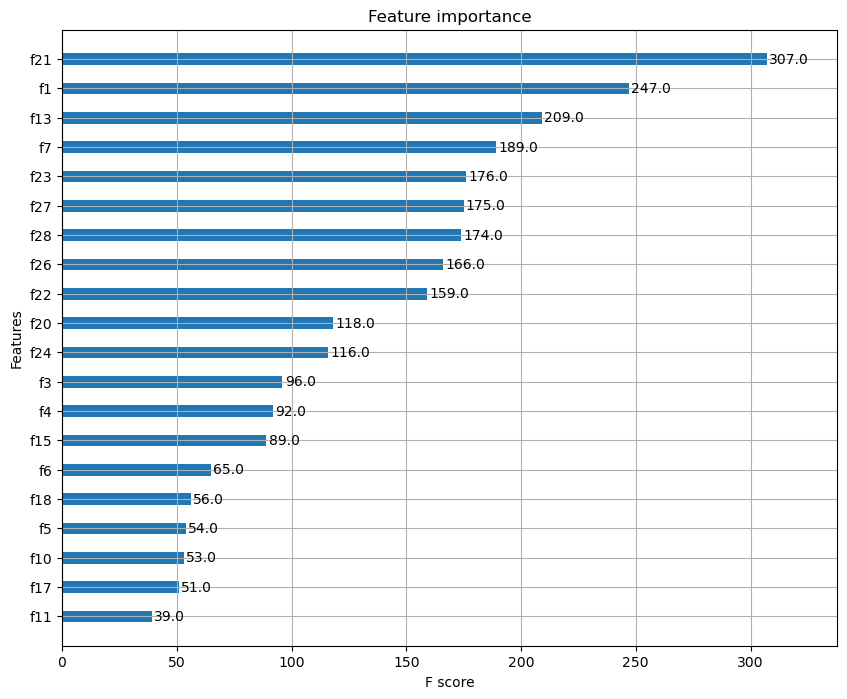

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

#### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.95437	valid_0's binary_logloss: 0.565079
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.986486	valid_0's binary_logloss: 0.507451
[3]	valid_0's auc: 0.987539	valid_0's binary_logloss: 0.458489
[4]	valid_0's auc: 0.987715	valid_0's binary_logloss: 0.417481
[5]	valid_0's auc: 0.985609	valid_0's binary_logloss: 0.385507
[6]	valid_0's auc: 0.987188	valid_0's binary_logloss: 0.355773
[7]	valid_0's auc: 0.989645	valid_0's binary_logloss: 0.329587
[8]	valid_0's auc: 0.98789	valid_0's binary_logloss: 0.308478
[9]	valid_0's auc: 0.990172	valid_0's binary_logloss: 0.285395
[10]	valid_0's auc: 0.98947	valid_0's binary_logloss: 0.267055
[11]	valid_0's auc: 0.990172	valid_0's binary_logloss: 0.252013
[12]	valid_0's auc: 0.991927	valid_0's binary_logloss: 0.237018
[13]	valid_0's auc: 0.991225	valid_0's binary_logloss: 0.224756
[14]	valid_0's auc: 0.989821	valid_0's binary_logloss: 0.213383
[15]	valid_0's auc: 0.990523	valid_0's binary_logloss:

In [ ]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
lgbm_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# cv는 3으로 지정 
gridcv = GridSearchCV(lgbm_clf, param_grid=params, cv=3)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.957878	valid_0's binary_logloss: 0.596093	valid_1's auc: 0.960337	valid_1's binary_logloss: 0.57101
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.969898	valid_0's binary_logloss: 0.539611	valid_1's auc: 0.969112	valid_1's binary_logloss: 0.519711
[3]	valid_0's auc: 0.971163	valid_0's binary_logloss: 0.493456	valid_1's auc: 0.969112	valid_1's binary_logloss: 0.477893
[4]	valid_0's auc: 0.984051	valid_0's binary_logloss: 0.450662	valid_1's auc: 0.984907	valid_1's binary_logloss: 0.43452
[5]	valid_0's auc: 0.984469	valid_0's binary_logloss: 0.416605	valid_1's auc: 0.986837	valid_1's binary_logloss: 0.400712
[6]	valid_0's auc: 0.988959	valid_0's binary_logloss: 0.384255	valid_1's auc: 0.990172	valid_1's binary_logloss: 0.372059
[7]	valid_0's auc: 0.987755	valid_0's binary_logloss: 0.359017	valid_1's auc: 0.988592	valid_1's binary_logloss: 0.350451
[8]	valid_0's auc: 0.988816	valid_0's binary_logloss: 0.333665	valid_1's auc: 0.989294	

[49]	valid_0's auc: 0.99502	valid_0's binary_logloss: 0.101682	valid_1's auc: 0.987364	valid_1's binary_logloss: 0.142099
[50]	valid_0's auc: 0.995143	valid_0's binary_logloss: 0.10029	valid_1's auc: 0.987364	valid_1's binary_logloss: 0.140541
[51]	valid_0's auc: 0.994918	valid_0's binary_logloss: 0.0995524	valid_1's auc: 0.987013	valid_1's binary_logloss: 0.140796
[52]	valid_0's auc: 0.995163	valid_0's binary_logloss: 0.0983589	valid_1's auc: 0.987715	valid_1's binary_logloss: 0.140405
[53]	valid_0's auc: 0.995163	valid_0's binary_logloss: 0.0975837	valid_1's auc: 0.987715	valid_1's binary_logloss: 0.139238
[54]	valid_0's auc: 0.995306	valid_0's binary_logloss: 0.0960022	valid_1's auc: 0.988066	valid_1's binary_logloss: 0.139152
[55]	valid_0's auc: 0.995286	valid_0's binary_logloss: 0.0948469	valid_1's auc: 0.988066	valid_1's binary_logloss: 0.137839
[56]	valid_0's auc: 0.995224	valid_0's binary_logloss: 0.0942934	valid_1's auc: 0.987013	valid_1's binary_logloss: 0.138189
Early stoppi

[16]	valid_0's auc: 0.992847	valid_0's binary_logloss: 0.212627	valid_1's auc: 0.988768	valid_1's binary_logloss: 0.223727
[17]	valid_0's auc: 0.993316	valid_0's binary_logloss: 0.202704	valid_1's auc: 0.990172	valid_1's binary_logloss: 0.215151
[18]	valid_0's auc: 0.993745	valid_0's binary_logloss: 0.191684	valid_1's auc: 0.989119	valid_1's binary_logloss: 0.20601
[19]	valid_0's auc: 0.994204	valid_0's binary_logloss: 0.183261	valid_1's auc: 0.989821	valid_1's binary_logloss: 0.197793
[20]	valid_0's auc: 0.994347	valid_0's binary_logloss: 0.174157	valid_1's auc: 0.989821	valid_1's binary_logloss: 0.190467
[21]	valid_0's auc: 0.994673	valid_0's binary_logloss: 0.166116	valid_1's auc: 0.989821	valid_1's binary_logloss: 0.182725
[22]	valid_0's auc: 0.99498	valid_0's binary_logloss: 0.159931	valid_1's auc: 0.990172	valid_1's binary_logloss: 0.177042
[23]	valid_0's auc: 0.995204	valid_0's binary_logloss: 0.153337	valid_1's auc: 0.990523	valid_1's binary_logloss: 0.17069
[24]	valid_0's auc:

[33]	valid_0's auc: 0.990327	valid_0's binary_logloss: 0.133124	valid_1's auc: 0.989645	valid_1's binary_logloss: 0.140667
[34]	valid_0's auc: 0.990571	valid_0's binary_logloss: 0.130511	valid_1's auc: 0.989996	valid_1's binary_logloss: 0.138311
[35]	valid_0's auc: 0.990408	valid_0's binary_logloss: 0.12902	valid_1's auc: 0.989996	valid_1's binary_logloss: 0.136932
[36]	valid_0's auc: 0.990408	valid_0's binary_logloss: 0.127556	valid_1's auc: 0.989996	valid_1's binary_logloss: 0.135847
[37]	valid_0's auc: 0.990633	valid_0's binary_logloss: 0.125339	valid_1's auc: 0.989996	valid_1's binary_logloss: 0.133804
[38]	valid_0's auc: 0.990449	valid_0's binary_logloss: 0.12377	valid_1's auc: 0.990347	valid_1's binary_logloss: 0.132283
[39]	valid_0's auc: 0.990673	valid_0's binary_logloss: 0.121465	valid_1's auc: 0.989996	valid_1's binary_logloss: 0.130866
[40]	valid_0's auc: 0.991051	valid_0's binary_logloss: 0.118475	valid_1's auc: 0.990347	valid_1's binary_logloss: 0.129662
[41]	valid_0's auc

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[LightGBM] [Warning] Unknown parameter: sumbsample
[1]	valid_0's auc: 0.954721	valid_0's binary_logloss: 0.57241
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.961741	valid_0's binary_logloss: 0.521824
[3]	valid_0's auc: 0.975781	valid_0's binary_logloss: 0.47769
[4]	valid_0's auc: 0.982099	valid_0's binary_logloss: 0.437405
[5]	valid_0's auc: 0.982976	valid_0's binary_logloss: 0.405489
[6]	valid_0's auc: 0.984029	valid_0's binary_logloss: 0.378009
[7]	valid_0's auc: 0.98596	valid_0's binary_logloss: 0.354405
[8]	valid_0's auc: 0.986486	valid_0's binary_logloss: 0.329984
[9]	valid_0's auc: 0.986486	valid_0's binary_logloss: 0.309991
[10]	valid_0's auc: 0.987364	valid_0's binary_logloss: 0.291926
[11]	valid_0's auc: 0.989645	valid_0's binary_logloss: 0.275664
[12]	valid_0's auc: 0.988943	valid_0's binary_logloss: 0.263267
[13]	valid_0's auc: 0.989996	valid_0's binary_logloss: 0.251367
[14]	valid_0's auc: 0.989645	valid_0's binary_logloss: 0.240974
[15

### 9. 분류실습 - 캐글 신용카드 사기 검출
- http://www.kaggle.com/mlg-ulb/creditcardfraud
- creditcard.csv 다운로드
- class 0: 정상, 1: 사기

#### 언더 샘플링과 오버 샘플링의 이해
레이블이 불균형한 분포를 가진 데이터 세트를 학습시킬때 예측성능의 문제가 발생
문제해결을 위해 오버샘플링과 언더샘플링으로 적절한 학습데이터를 확보

![샘플링](img/샘플링.jpg)

SMOTE(Synthetic Minority Over-sampling Method)
![smote](img/smote.jpg)

SMOTE를 구현한 대표적인 파이썬 패키지는 imbalanced-learn  
conda install -c conda-forge imbalanced-learn 설치

#### 데이터 일차가공 및 모델 학습/예측/평가

In [ ]:
conda install -c conda-forge imbalanced-learn 

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Admin\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    imbalanced-learn-0.10.1    |     pyhd8ed1ab_0         131 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         131 KB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.10.1-pyhd8ed1ab_0 

The following packages will be SUPERSEDED by a higher-priority channel:

  conda              pkgs/main::conda-22.11.1-py39haa95532~ --> conda-forge::conda-22.11.1-py39hcbf5309_1 




imbalanced-learn-0.1 | 131 KB    |            |   0% 
imbalanced-learn-0.1 | 131 KB    | #2         |  12% 
imbalanced-learn-0.1 | 131 KB    | ########## | 100% 
imbalanced-le

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

card_df = pd.read_csv('./train/train_creditcard.csv')
card_df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


amount : 신용카드 트랙잭션 금액

In [ ]:
from sklearn.model_selection import train_test_split

# 인자로 입력받은 DataFrame을 복사 한 뒤 Time 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    df_copy.drop('Time', axis=1, inplace=True)
    return df_copy

In [ ]:
# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(df=None):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    df_copy = get_preprocessed_df(df)
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = df_copy.iloc[:, :-1]
    y_target = df_copy.iloc[:, -1]
    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    X_train, X_test, y_train, y_test = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

In [ ]:
print('학습 데이터 레이블 값 비율')
print(y_train.value_counts()/y_train.shape[0] * 100)
print('테스트 데이터 레이블 값 비율')
print(y_test.value_counts()/y_test.shape[0] * 100)

학습 데이터 레이블 값 비율
0    99.827451
1     0.172549
Name: Class, dtype: float64
테스트 데이터 레이블 값 비율
0    99.826785
1     0.173215
Name: Class, dtype: float64


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
lr_pred_proba = lr_clf.predict_proba(X_test)[:, 1]

# 3장에서 사용한 get_clf_eval() 함수를 이용하여 평가 수행. 
get_clf_eval(y_test, lr_pred, lr_pred_proba)

오차 행렬
[[85278    17]
 [   54    94]]
정확도: 0.9992, 정밀도: 0.8468, 재현율: 0.6351,    F1: 0.7259, AUC:0.9558


In [ ]:
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:, 1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [ ]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

오차 행렬
[[85290     5]
 [   36   112]]
정확도: 0.9995, 정밀도: 0.9573, 재현율: 0.7568,    F1: 0.8453, AUC:0.9790


### 데이터 분포도 변환후 모델 학습/예측/평가
- 왜곡된 분포도를 가지는 데이터를 재가공 후 모델 테스트
- 대부분의 선형모델은 중요 피처들의 값이 정규분포 형태를 유지하는 것을 선호

<AxesSubplot:xlabel='Amount', ylabel='Density'>

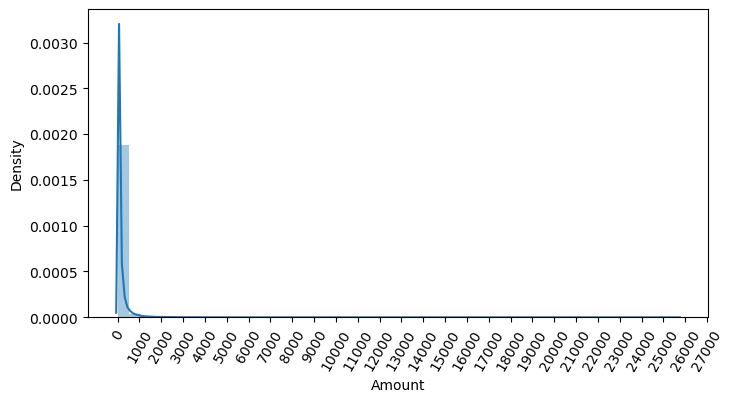

In [ ]:
import seaborn as sns

plt.figure(figsize=(8, 4))
plt.xticks(range(0, 30000, 1000), rotation=60)
sns.distplot(card_df['Amount'])

In [ ]:
from sklearn.preprocessing import StandardScaler
# 사이킷런의 StandardScaler를 이용하여 정규분포 형태로 Amount 피처값 변환하는 로직으로 수정. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    scaler = StandardScaler()
    amount_n = scaler.fit_transform(df_copy['Amount'].values.reshape(-1, 1))
    # 변환된 Amount를 Amount_Scaled로 피처명 변경후 DataFrame맨 앞 컬럼으로 입력
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    # 기존 Time, Amount 피처 삭제
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
# Amount를 정규분포 형태로 변환 후 로지스틱 회귀 및 LightGBM 수행. 
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
lr_clf = LogisticRegression()
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   58    90]]
정확도: 0.9992, 정밀도: 0.8654, 재현율: 0.6081,    F1: 0.7143, AUC:0.9702
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   37   111]]
정확도: 0.9995, 정밀도: 0.9569, 재현율: 0.7500,    F1: 0.8409, AUC:0.9779


#### 로그변환 수행
- 정규분포 변환의 성능은 크게 개선되지 않았음
- 원래 값을 log 값으로 변환해 원래 큰 값을 상대적으로 작은 값으로 변환하기 때문에 데이터 분포도의 왜곡을 상당 수준 개선

In [ ]:
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    # 넘파이의 log1p( )를 이용하여 Amount를 로그 변환 
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    return df_copy

In [ ]:
X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)

print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85283    12]
 [   59    89]]
정확도: 0.9992, 정밀도: 0.8812, 재현율: 0.6014,    F1: 0.7149, AUC:0.9727
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   35   113]]
정확도: 0.9995, 정밀도: 0.9576, 재현율: 0.7635,    F1: 0.8496, AUC:0.9796


#### 이상치 데이터 제거 후 모델 학습/예측/평가
- 이상치 데이터(outlier) : 전체 데이터의 패턴에서 벗어난 이상값을 가진 데이터
- 이상치를 찾아내는 방법과 이들 데이터를 제거한뒤 다시 모델 평가
- IQR(Inter Quantile Range) 방식적용
![iqr](img/iqr.jpg)

- 이상치 데이터 검출 방식
![이상치](img/이상치.jpg)

- 매우 많은 피처가 있을 경우, 결정값(레이블)과 가장 상관성이 높은 피처들을 위주로 이상치를 검출

<AxesSubplot:>

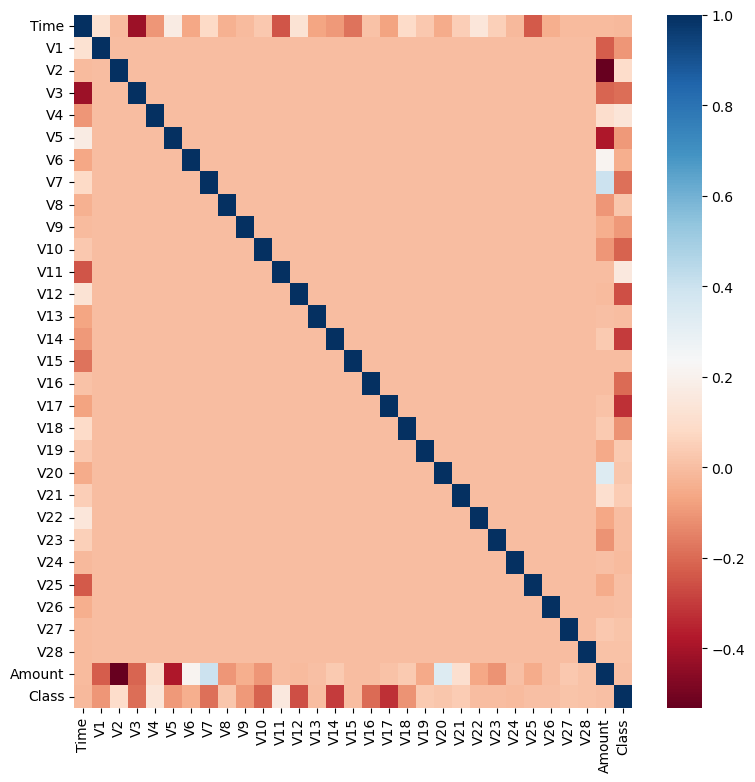

In [ ]:
import seaborn as sns

plt.figure(figsize=(9, 9))
corr = card_df.corr()
sns.heatmap(corr, cmap='RdBu')

양의 상관관계 : 파란색, 음의 상관관계: 빨간색

In [ ]:
import numpy as np

def get_outlier(df=None, column=None, weight=1.5):
    # fraud에 해당하는 column 데이터만 추출, 1/4 분위와 3/4 분위 지점을 np.percentile로 구함. 
    fraud = df[df['Class']==1][column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    # IQR을 구하고, IQR에 1.5를 곱하여 최대값과 최소값 지점 구함. 
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    # 최대값 보다 크거나, 최소값 보다 작은 값을 아웃라이어로 설정하고 DataFrame index 반환. 
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_index

In [ ]:
outlier_index = get_outlier(df=card_df, column='V14', weight=1.5)
print('이상치 데이터 인덱스:', outlier_index)

이상치 데이터 인덱스: Int64Index([8296, 8615, 9035, 9252], dtype='int64')


In [ ]:
# get_processed_df( )를 로그 변환 후 V14 피처의 이상치 데이터를 삭제하는 로직으로 변경. 
def get_preprocessed_df(df=None):
    df_copy = df.copy()
    amount_n = np.log1p(df_copy['Amount'])
    df_copy.insert(0, 'Amount_Scaled', amount_n)
    df_copy.drop(['Time','Amount'], axis=1, inplace=True)
    # 이상치 데이터 삭제하는 로직 추가
    outlier_index = get_outlier(df=df_copy, column='V14', weight=1.5)
    df_copy.drop(outlier_index, axis=0, inplace=True)
    return df_copy

X_train, X_test, y_train, y_test = get_train_test_dataset(card_df)
print('### 로지스틱 회귀 예측 성능 ###')
get_model_train_eval(lr_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)
print('### LightGBM 예측 성능 ###')
get_model_train_eval(lgbm_clf, ftr_train=X_train, ftr_test=X_test, tgt_train=y_train, tgt_test=y_test)

### 로지스틱 회귀 예측 성능 ###
오차 행렬
[[85281    14]
 [   48    98]]
정확도: 0.9993, 정밀도: 0.8750, 재현율: 0.6712,    F1: 0.7597, AUC:0.9743
### LightGBM 예측 성능 ###
오차 행렬
[[85290     5]
 [   25   121]]
정확도: 0.9996, 정밀도: 0.9603, 재현율: 0.8288,    F1: 0.8897, AUC:0.9780


#### SMOTE 오버 샘플링 적용 후 모델 학습/예측/평가
- SMOTE 를 적용할 때는 반드시 학습 데이터 세트만 오버 샘플링을 해야만 함
- SMOTE 객체의 fit_sample() 메서드를 이용해 증식

In [ ]:
conda install -c conda-forge imbalanced-learn 

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print('SMOTE 적용 전 학습용 피처/레이블 데이터 세트: ', X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트: ', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 레이블 값 분포: \n', pd.Series(y_train_over).value_counts())

AttributeError: 'SMOTE' object has no attribute 'fit_sample'

In [ ]:
lr_clf = LogisticRegression()
# ftr_train과 tgt_train 인자값이 SMOTE 증식된 X_train_over와 y_train_over로 변경됨에 유의
get_model_train_eval(lr_clf, ftr_train=X_train_over, ftr_test=X_test, tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[82937  2358]
 [   11   135]]
정확도: 0.9723, 정밀도: 0.0542, 재현율: 0.9247,    F1: 0.1023, AUC:0.9737


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import precision_recall_curve
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    # threshold ndarray와 이 threshold에 따른 정밀도, 재현율 ndarray 추출. 
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    # X축을 threshold값으로, Y축은 정밀도, 재현율 값으로 각각 Plot 수행. 정밀도는 점선으로 표시
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    # threshold 값 X 축의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    
    # x축, y축 label과 legend, 그리고 grid 설정
    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()

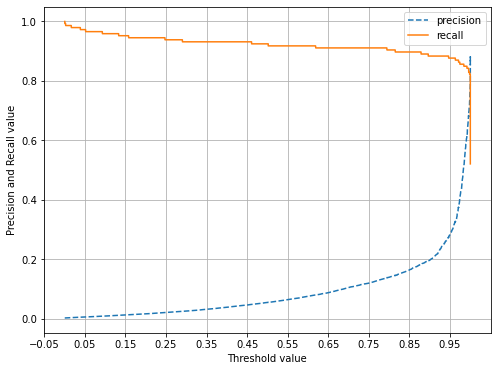

In [ ]:
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )

- 분류결정 임계값을 조정하더라도 임계값의 민감도가 너무 심해 올바른 재현율/정밀도 성능을 얻을 수 없으므로 로지스틱 회귀 모형의 경우 SMOTE 적용후 올바른 예측 모델이 생성되지 못했음
- LightGBM 모델을 SMOTE 로 오버 샘플링된 데이터 세트로 학습/예측/평가 수행

In [ ]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, ftr_train=X_train_over, ftr_test=X_test,
                  tgt_train=y_train_over, tgt_test=y_test)

오차 행렬
[[85283    12]
 [   22   124]]
정확도: 0.9996, 정밀도: 0.9118, 재현율: 0.8493,    F1: 0.8794, AUC:0.9814


#### 결과정리
![정리](img/비교1.jpg)

### 10. 스태킹 앙상블
- 개별적인 여러 알고리즘을 서로 결합해 예측결과 도출
- 차이점 : 개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행
- 즉, 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종학습을 수행하고, 테스트 데이터를 기반으로 다시 최종예측을 수행하는 방식
- 개별적인 기반모델과 이 개별 기반 모델의 예측데이터를 학습데이터로 만들어서 학습하는 최종 메타모델이 있음
- 스태킹 모델의 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것
- 스태킹을 적용할 때는 많은 개별 모델이 필요
- 일반적으로 성능이 비슷한 모델을 결합해 좀 더 나은 성능향상을 도출하기 위해 적용
![스태킹1](img/스태킹1.jpg)

![스태킹2](img/스태킹2.png)

#### 기본 스태킹 모델

In [ ]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train , X_test , y_train , y_test = train_test_split(X_data , y_label , test_size=0.2 , random_state=0)

In [ ]:
# 개별 ML 모델을 위한 Classifier 생성.
knn_clf  = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 최종 Stacking 모델을 위한 Classifier생성. 
lr_final = LogisticRegression(C=10)

In [ ]:
# 개별 모델들을 학습. 
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train , y_train)
dt_clf.fit(X_train , y_train)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

In [ ]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 셋을 생성하고 개별 모델의 정확도 측정. 
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정 트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f} :'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9035
에이다부스트 정확도: 0.9561 :


- 개별 알고리즘으로 부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처값으로 만들어, 최종 메타모델에 학습데이터로 사용
- 반환된 예측데이터 세트는 1차원 형태의 ndarray 이므로 먼저 반환된 예측결과를 행 형태로 붙인 뒤, 넘파이의 transpose()를 이용해 행과 열을 바꾼 ndarray 로 변환하면 됨

In [ ]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 컬럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦. 
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [ ]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test , final)))

최종 메타 모델의 예측 정확도: 0.9737


CV 셋 기반의 Stacking
- 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용
- step1: 각 모델별로 원본 학습/테스트 데이터를 예측한 결과 값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성
- step2: step 1에서 개별 모델들이 생성한 학습용 데이터를 모두 스태킹 형태로 합쳐서 메타모델이 학습할 최종 학습용 데이터 세트를 생성. 마찬가지로 각 모델들이 생성한 테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 예측할 최종 테스트 데이터세트 생성. 메타모델은 최종적으로 생성된 학습데이터세트와 원본 학습데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 세트를 예측하고, 원본 테스트 데이터의 레이블 데이터를 기반으로 평가

![s1](img/s1.jpg)
![s2](img/s2.jpg)
![s3](img/s3.jpg)
![s4](img/s4.jpg)

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수. 
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
    # 지정된 n_folds값으로 KFold 생성.
    kf = KFold(n_splits=n_folds, shuffle=False, random_state=0)
    #추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화 
    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        #입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 셋 추출 
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
        #폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
        model.fit(X_tr , y_tr)       
        #폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
        #입력된 원본 테스트 데이터를 폴드 세트내 학습된 기반 모델에서 예측 후 데이터 저장. 
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
    # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
    #train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
    return train_fold_pred , test_pred_mean

In [ ]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test,  7)    
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 


In [ ]:
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:',X_train.shape, '원본 테스트 피처 Shape:',X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape,
      '스태킹 테스트 피처 데이터 Shape:',Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


In [ ]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737
